# Player Performance Prediction in Euro League Football

## Overview

### What are we trying to do?
We aim to develop machine learning models that predict football player performance in future Euro League matches. Unlike traditional models, our approach integrates player statistics, weather conditions, and player form, providing a more realistic and comprehensive performance prediction.

### What is new in our approach and why will it be successful?

#### Innovative Aspects of Our Approach:
- Multi-Source Data Integration: We combine traditional player statistics with external factors like weather conditions, match conditions, and player form for a more holistic view.
- Advanced Machine Learning Techniques: Leveraging ensemble methods and deep learning models, we aim to capture intricate patterns in player performance.
- Personalized Player Profiles: Creating dynamic player profiles that consider historical performance trends to refine predictions.

#### Why will this approach be successful?
- Overcomes Traditional Model Limitations: By incorporating multiple external factors, we increase prediction accuracy.
- More Nuanced and Accurate Predictions: Advanced ML models allow us to make highly detailed performance estimates.
- Better Decision-Making: Managers, analysts, and betting companies can rely on personalized insights for better forecasting and strategy.

### Who cares? What difference will it make?

#### Primary Stakeholders & Their Interests
- Team Managers & Coaches: Optimize player selection and game strategies based on predicted performance.
- Sports Analysts & Broadcasters: Use insights to enhance game analysis and provide data-driven narratives.
- Betting Companies & Enthusiasts: More accurate performance predictions can lead to better betting strategies.
- Football Fans: Offers a deeper understanding of team and player dynamics, enriching their viewing experience.

By successfully implementing this data-driven approach, we aim to redefine football performance analytics and provide stakeholders with actionable insights to enhance decision-making in Euro League football.

---

### How to Run This Project in Google Colab
1. Open Google Colab and ensure GPU acceleration is enabled.
2. Upload the dataset or link it to an external source (Google Drive, APIs, etc.).
3. Run the data preprocessing and model training cells.
4. Evaluate performance and make predictions using test data.
5. Visualize the predictions and analyze model performance.

---

Ready to revolutionize football analytics? Let's dive into the code!

https://data.world/cclayford/statbunker-football-statistics

In [ ]:
#pip install --upgrade numpy

In [ ]:
#pip install --upgrade pandas

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Data Preparation
Our data is segmented into leagues, attendance records, player statistics, and team statistics. We aim to merge these datasets using league, season, and player as key variables.

In [ ]:
import pandas as pd

# Load all the CSV files
league_nationalities = pd.read_csv('Combined_League_Nationalities_2014-2023.csv')
attendance = pd.read_csv('Full_Combined_Attendance_2014-2023.csv')
tables = pd.read_csv('Combined_Tables_2014-2023.csv')
team_stats = pd.read_csv('Combined_Team_Stats_2014-2023.csv')
player_stats = pd.read_csv('Combined_Player_Stats_2014-2023.csv')



In [ ]:

# Check the columns to ensure we have 'league' and 'Players' columns
{
    "league_nationalities_columns": league_nationalities.columns.tolist(),
    "attendance_columns": attendance.columns.tolist(),
    "tables_columns": tables.columns.tolist(),
    "team_stats_columns": team_stats.columns.tolist(),
    "player_stats_columns": player_stats.columns.tolist()
}

{'league_nationalities_columns': ['League',
  'Country',
  'Team',
  'Players',
  'Season',
  'KEY'],
 'attendance_columns': ['League_Home',
  'Team_Home',
  'Avg Home Attendance',
  'Total Home Attendance',
  'Highest Home Attendance',
  'Lowest Home Attendance',
  'Season_Home',
  'KEY',
  'League_Away',
  'Team_Away',
  'Avg Away Attendance',
  'Total Away Attendance',
  'Highest Away Attendance',
  'Lowest Away Attendance',
  'Season_Away'],
 'tables_columns': ['League',
  'Pos',
  'Team',
  'P',
  'W',
  'D',
  'L',
  'F',
  'A',
  'GD',
  'Pts',
  'Table Type',
  'Season',
  'KEY'],
 'team_stats_columns': ['League_Defense',
  'Goals Against',
  'Team',
  'GA Home',
  'GA Away',
  'GA First Half',
  'GA Second Half',
  'GA First 15 mins',
  'GA Last 10 mins',
  'GA Home Matches Scored In',
  'GA Away Matches Scored In',
  'GA Pld',
  'GA Per Match',
  'Season',
  'KEY_Defense',
  'League_Offense',
  'Goals For',
  'GF Home',
  'GF Away',
  'GF First Half',
  'GF Second Half',
  'G

In [ ]:
# Verify the presence of 'Team' and 'Season' columns in each dataset after renaming
{
    "league_nationalities_columns": league_nationalities.columns.tolist(),
    "attendance_columns": attendance.columns.tolist(),
    "tables_columns": tables.columns.tolist(),
    "team_stats_columns": team_stats.columns.tolist(),
    "player_stats_columns": player_stats.columns.tolist()
}


{'league_nationalities_columns': ['League',
  'Country',
  'Team',
  'Players',
  'Season',
  'KEY'],
 'attendance_columns': ['League_Home',
  'Team_Home',
  'Avg Home Attendance',
  'Total Home Attendance',
  'Highest Home Attendance',
  'Lowest Home Attendance',
  'Season_Home',
  'KEY',
  'League_Away',
  'Team_Away',
  'Avg Away Attendance',
  'Total Away Attendance',
  'Highest Away Attendance',
  'Lowest Away Attendance',
  'Season_Away'],
 'tables_columns': ['League',
  'Pos',
  'Team',
  'P',
  'W',
  'D',
  'L',
  'F',
  'A',
  'GD',
  'Pts',
  'Table Type',
  'Season',
  'KEY'],
 'team_stats_columns': ['League_Defense',
  'Goals Against',
  'Team',
  'GA Home',
  'GA Away',
  'GA First Half',
  'GA Second Half',
  'GA First 15 mins',
  'GA Last 10 mins',
  'GA Home Matches Scored In',
  'GA Away Matches Scored In',
  'GA Pld',
  'GA Per Match',
  'Season',
  'KEY_Defense',
  'League_Offense',
  'Goals For',
  'GF Home',
  'GF Away',
  'GF First Half',
  'GF Second Half',
  'G

In [ ]:
# Convert 'League', 'Team', and 'Season' columns to string in all datasets to ensure consistent data types for merging
league_nationalities['League'] = league_nationalities['League'].astype(str)
league_nationalities['Team'] = league_nationalities['Team'].astype(str)
league_nationalities['Season'] = league_nationalities['Season'].astype(str)

attendance['League'] = attendance['League'].astype(str)
attendance['Team'] = attendance['Team'].astype(str)

# Try merging again
combined_df_step = pd.merge(league_nationalities, attendance, on=['League', 'Team'], how='outer')

# Check the first few rows and the structure of the newly merged dataframe
combined_df_step.head(), combined_df_step.columns


(       League Country        Team  Players Season KEY_x League_Home  \
 0  Bundesliga     NaN  1. FC Koln      NaN    NaN   NaN  Bundesliga   
 1  Bundesliga     NaN  1. FC Koln      NaN    NaN   NaN  Bundesliga   
 2  Bundesliga     NaN  1. FC Koln      NaN    NaN   NaN  Bundesliga   
 3  Bundesliga     NaN  1. FC Koln      NaN    NaN   NaN  Bundesliga   
 4  Bundesliga     NaN  1. FC Koln      NaN    NaN   NaN  Bundesliga   
 
     Team_Home Avg Home Attendance Total Home Attendance  ...  \
 0  1. FC Koln              48,329               821,600  ...   
 1  1. FC Koln              48,676               827,500  ...   
 2  1. FC Koln              49,571               842,700  ...   
 3  1. FC Koln              48,776               829,200  ...   
 4  1. FC Koln              49,717               596,600  ...   
 
   Lowest Home Attendance Season_Home                          KEY_y  \
 0                 42,900     2014/15  Bundesliga|1. FC Koln|2014/15   
 1                 45,500     

In [ ]:
# Merge the next dataset (tables) with the current combined dataframe
# First, ensure that 'Team' and 'Season' are strings in the tables dataset
tables['Team'] = tables['Team'].astype(str)
tables['Season'] = tables['Season'].astype(str)

# Perform the merge
combined_df_step = pd.merge(combined_df_step, tables, on=['League', 'Team', 'Season'], how='outer')

# Check the first few rows and the structure of the newly merged dataframe
combined_df_step.head(), combined_df_step.columns


(       League Country        Team  Players   Season KEY_x League_Home  \
 0  Bundesliga     NaN  1. FC Koln      NaN  2014/15   NaN         NaN   
 1  Bundesliga     NaN  1. FC Koln      NaN  2014/15   NaN         NaN   
 2  Bundesliga     NaN  1. FC Koln      NaN  2014/15   NaN         NaN   
 3  Bundesliga     NaN  1. FC Koln      NaN  2015/16   NaN         NaN   
 4  Bundesliga     NaN  1. FC Koln      NaN  2015/16   NaN         NaN   
 
   Team_Home Avg Home Attendance Total Home Attendance  ...   P   W   D   L  \
 0       NaN                 NaN                   NaN  ...  34   9  12  13   
 1       NaN                 NaN                   NaN  ...  17   4   8   5   
 2       NaN                 NaN                   NaN  ...  17   5   4   8   
 3       NaN                 NaN                   NaN  ...  34  10  13  11   
 4       NaN                 NaN                   NaN  ...  17   5   5   7   
 
       F     A   GD   Pts         Table Type                            KEY  


In [ ]:
# Ensure 'Team' and 'Season' are strings in the team_stats dataset
team_stats['Team'] = team_stats['Team'].astype(str)
team_stats['Season'] = team_stats['Season'].astype(str)

# Merge the team_stats dataset with the current combined dataframe
combined_df_step = pd.merge(combined_df_step, team_stats, on=[ 'Team', 'Season'], how='outer')

# Check the first few rows and the structure of the newly merged dataframe
combined_df_step.head(), combined_df_step.columns


(       League Country        Team  Players   Season KEY_x League_Home  \
 0  Bundesliga     NaN  1. FC Koln      NaN  2014/15   NaN         NaN   
 1  Bundesliga     NaN  1. FC Koln      NaN  2014/15   NaN         NaN   
 2  Bundesliga     NaN  1. FC Koln      NaN  2014/15   NaN         NaN   
 3  Bundesliga     NaN  1. FC Koln      NaN  2015/16   NaN         NaN   
 4  Bundesliga     NaN  1. FC Koln      NaN  2015/16   NaN         NaN   
 
   Team_Home Avg Home Attendance Total Home Attendance  ... GF Away  \
 0       NaN                 NaN                   NaN  ...      16   
 1       NaN                 NaN                   NaN  ...      16   
 2       NaN                 NaN                   NaN  ...      16   
 3       NaN                 NaN                   NaN  ...      22   
 4       NaN                 NaN                   NaN  ...      22   
 
   GF First Half GF Second Half GF First 15 mins GF Last 10 mins  \
 0            16             17                7          

In [ ]:
# Ensure 'Team' and 'Season' are strings in the player_stats dataset
player_stats['Team'] = player_stats['Team'].astype(str)
player_stats['Season'] = player_stats['Season'].astype(str)

# Merge the player_stats dataset with the current combined dataframe
combined_df_step = pd.merge(combined_df_step, player_stats, on=['League', 'Team', 'Season'], how='outer', suffixes=('', '_player_stats'))

# Check the first few rows and the structure of the newly merged dataframe
combined_df_step.head(), combined_df_step.columns


(       League Country        Team  Players   Season KEY_x League_Home  \
 0  Bundesliga     NaN  1. FC Koln      NaN  2014/15   NaN         NaN   
 1  Bundesliga     NaN  1. FC Koln      NaN  2014/15   NaN         NaN   
 2  Bundesliga     NaN  1. FC Koln      NaN  2014/15   NaN         NaN   
 3  Bundesliga     NaN  1. FC Koln      NaN  2014/15   NaN         NaN   
 4  Bundesliga     NaN  1. FC Koln      NaN  2014/15   NaN         NaN   
 
   Team_Home Avg Home Attendance Total Home Attendance  ...  \
 0       NaN                 NaN                   NaN  ...   
 1       NaN                 NaN                   NaN  ...   
 2       NaN                 NaN                   NaN  ...   
 3       NaN                 NaN                   NaN  ...   
 4       NaN                 NaN                   NaN  ...   
 
   Minutes per Yellow Cards Sent Off Straight Red Card Two Yellow Cards  \
 0                      NaN      NaN               NaN              NaN   
 1                     1

In [ ]:
# Checking the shape of the final merged dataset
combined_df_step.shape


(112540, 112)

In [ ]:
# Checking for missing values in the 'Player' and 'League' columns
missing_values = {
    "Missing Players": combined_df_step['Player'].isnull().sum(),
    "Missing Leagues": combined_df_step['League'].isnull().sum()
}

missing_values


{'Missing Players': 7680, 'Missing Leagues': 0}

In [ ]:
#save as 'Final_Merged_Data.csv'

# Save the final merged dataset to a CSV file
combined_df_step.to_csv('Final_Merged_Data.csv', index=False)

# Preprocessing
To start, we examine the data to understand key columns and relationships, identifying the most important features for predicting player performance. We also conduct basic exploratory visualizations.

In [ ]:
import pandas as pd

Modeling_data = pd.read_csv('Final_Merged_Data.csv')


In [ ]:
Modeling_data.shape

(112540, 112)

In [ ]:
Modeling_data.describe()

,Players,Pos,F,A,GD,Pts,Goals Against,GA Per Match,Goals For,GF Per Match,Minutes played,Min/goal,Assists,% Assists,Recipient Goals,CS,Hat Tricks,Sent Off,Minutes per Red Cards
count,3408.000000,108153.000000,108153.000000,108153.000000,108153.000000,108153.000000,108153.000000,108153.000000,108153.000000,108153.000000,9375.000000,9375.000000,5241.000000,5241.000000,5241.000000,6555.000000,1371.000000,10371.000000,10371.000000
mean,8.772887,10.011317,33.186134,33.680490,-0.494355,33.033795,50.524202,1.392240,49.782780,1.372042,1983.648640,284.509760,6.977676,12.220950,2.680595,4.838902,1.225383,1.103558,1745.553075
std,32.565647,5.590698,17.306142,15.828936,19.630521,17.529441,13.745848,0.366634,17.188367,0.467013,747.734593,286.034459,2.589261,4.565347,1.304815,4.789431,0.668016,0.341416,822.557918
min,1.000000,1.000000,0.000000,0.000000,-61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,-12.000000
25%,1.000000,5.000000,21.000000,22.000000,-13.000000,20.000000,42.000000,1.150000,38.000000,1.050000,1433.000000,170.000000,5.000000,9.000000,2.000000,1.000000,1.000000,1.000000,1099.000000
50%,2.000000,10.000000,29.000000,30.000000,-3.000000,30.000000,51.000000,1.390000,47.000000,1.260000,2062.000000,226.000000,6.000000,12.000000,2.000000,4.000000,1.000000,1.000000,1759.000000
75%,5.000000,15.000000,42.000000,43.000000,9.000000,42.000000,60.000000,1.630000,58.000000,1.600000,2573.000000,301.000000,8.000000,15.000000,3.000000,8.000000,1.000000,1.000000,2430.000000
max,364.000000,20.000000,118.000000,94.000000,89.000000,106.000000,94.000000,2.770000,118.000000,3.570000,3420.000000,3230.000000,21.000000,33.000000,11.000000,25.000000,8.000000,5.000000,3490.000000


In [ ]:
Modeling_data.shape

(112540, 112)

In [ ]:
#checking for missing values

# Check for missing values in the entire dataset
missing_values_count = Modeling_data.isnull().sum()

# Display the count of missing values for each column
print(missing_values_count)

# Calculate the percentage of missing values for each column
missing_values_percentage = (Modeling_data.isnull().sum() / len(Modeling_data)) * 100

# Display the percentage of missing values for each column
missing_values_percentage

League                        0
Country                  109132
Team                       3408
Players                  109132
Season                      977
                          ...  
Red - Second Half        102169
Red - Home               102169
Red - Away               102169
Red - Minutes Played     102169
Minutes per Red Cards    102169
Length: 112, dtype: int64


,0
League,0.000000
Country,96.971743
Team,3.028257
Players,96.971743
Season,0.868136
...,...
Red - Second Half,90.784610
Red - Home,90.784610
Red - Away,90.784610
Red - Minutes Played,90.784610


In [ ]:
#seperate numerical and categorical columns

numerical_cols = Modeling_data.select_dtypes(include=['number']).columns
categorical_cols = Modeling_data.select_dtypes(include=['object']).columns

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numerical columns: Index(['Players', 'Pos', 'F', 'A', 'GD', 'Pts', 'Goals Against',
       'GA Per Match', 'Goals For', 'GF Per Match', 'Minutes played',
       'Min/goal', 'Assists', '% Assists', 'Recipient Goals', 'CS',
       'Hat Tricks', 'Sent Off', 'Minutes per Red Cards'],
      dtype='object')
Categorical columns: Index(['League', 'Country', 'Team', 'Season', 'KEY_x', 'League_Home',
       'Team_Home', 'Avg Home Attendance', 'Total Home Attendance',
       'Highest Home Attendance', 'Lowest Home Attendance', 'Season_Home',
       'KEY_y', 'League_Away', 'Team_Away', 'Avg Away Attendance',
       'Total Away Attendance', 'Highest Away Attendance',
       'Lowest Away Attendance', 'Season_Away', 'P', 'W', 'D', 'L',
       'Table Type', 'KEY', 'League_Defense', 'GA Home', 'GA Away',
       'GA First Half', 'GA Second Half', 'GA First 15 mins',
       'GA Last 10 mins', 'GA Home Matches Scored In',
       'GA Away Matches Scored In', 'GA Pld', 'KEY_Defense', 'League_Offense',
     

### Exploring the data
To start, we examine the data to understand key columns and relationships, identifying the most important features for predicting player performance. We also conduct basic exploratory visualizations.

In [ ]:
import pandas as pd
Modeling_data = pd.read_csv('Final_Merged_Data.csv')
Modeling_data.head()

,League,Country,Team,Players,Season,KEY_x,League_Home,Team_Home,Avg Home Attendance,Total Home Attendance,...,Minutes per Yellow Cards,Sent Off,Straight Red Card,Two Yellow Cards,Red - First Half,Red - Second Half,Red - Home,Red - Away,Red - Minutes Played,Minutes per Red Cards
0,Bundesliga,NaN,1. FC Koln,NaN,2014/15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bundesliga,NaN,1. FC Koln,NaN,2014/15,NaN,NaN,NaN,NaN,NaN,...,1485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bundesliga,NaN,1. FC Koln,NaN,2014/15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bundesliga,NaN,1. FC Koln,NaN,2014/15,NaN,NaN,NaN,NaN,NaN,...,316.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bundesliga,NaN,1. FC Koln,NaN,2014/15,NaN,NaN,NaN,NaN,NaN,...,720,1.0,1,-,-,1,1,-,2880.0,2880.0


# Data Cleaning
we clean the data for null values imputing where required and handeling missing values accordingly

In [ ]:
missing_values_count = Modeling_data.isnull().sum()

# Create a DataFrame with column names and their corresponding missing value counts
missing_df = pd.DataFrame({'Column': missing_values_count.index, 'Missing Values': missing_values_count.values})

# Print the DataFrame
missing_df

,Column,Missing Values
0,League,0
1,Country,109132
2,Team,3408
3,Players,109132
4,Season,977
...,...,...
107,Red - Second Half,102169
108,Red - Home,102169
109,Red - Away,102169
110,Red - Minutes Played,102169


from matplotlib import pyplot as plt
missing_df['Missing Values'].plot(kind='hist', bins=20, title='Missing Values')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
missing_df['Missing Values'].plot(kind='line', figsize=(8, 4), title='Missing Values')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#['League_x', 'Team', 'Season', 'Player', 'Position', 'Appearances',
#       'Goals', 'Started', 'Started As A Sub', 'Came On', 'Taken Off',
 #      'Own Goals', 'First Half', 'Second Half', 'First Scorer', 'Last Scorer',
#       'Home', 'Away', 'Right Foot', 'Left Foot', 'Header', 'Other Method',
#       'Open Play', 'Cross', 'Free Kick', 'Direct Free Kick', 'Throw In',
 #      'Penalty', 'Corner', 'Other Type Of Play', 'Minutes played', 'Min/goal',
 #      'Assists', '% Assists', 'Recipient Goals', 'CS', '% Clean Sheets',
 #      'Hat Tricks', 'Yellow Cards', 'Yellow - First Half',
 #      'Yellow - Second Half', 'Yellow - Home', 'Yellow - Away',
 #      'Yelow - Minutes Played', 'Minutes per Yellow Cards', 'Sent Off',
 #      'Straight Red Card', 'latitude', 'longitude', 'game_date', 'tavg',
 #      'tmin', 'tmax', 'prcp', 'wspd', 'weather_summary', 'GA Home', 'GA Away',
 #      'GA First Half', 'GA Second Half', 'GA First 15 mins',
 #      'GA Last 10 mins', 'GA Home Matches Scored In',
 #      'GA Away Matches Scored In', 'GA Per Match', 'GF Home', 'GF Away',
 #      'GF First Half', 'GF Second Half', 'GF First 15 mins',
 #      'GF Last 10 mins', 'GF Home Matches Scored In',
 #      'GF Away Matches Scored In', 'GF Per Match', 'Goals Against',
 #      'Goals For']

Final_Modeling_data = Modeling_data[['League', 'Team', 'Season', 'Player', 'Position', 'Appearances',
       'Goals', 'Started', 'Started As A Sub', 'Came On', 'Taken Off',
       'Own Goals', 'First Half', 'Second Half', 'First Scorer', 'Last Scorer',
       'Home', 'Away', 'Right Foot', 'Left Foot', 'Header', 'Other Method',
       'Open Play', 'Cross', 'Free Kick', 'Direct Free Kick', 'Throw In',
       'Penalty', 'Corner', 'Other Type Of Play', 'Minutes played', 'Min/goal',
       'Assists', '% Assists', 'Recipient Goals', 'CS', '% Clean Sheets',
       'Hat Tricks', 'Yellow Cards', 'Yellow - First Half',
       'Yellow - Second Half', 'Yellow - Home', 'Yellow - Away',
       'Yelow - Minutes Played', 'Minutes per Yellow Cards', 'Sent Off',
       'Straight Red Card', 'GA Home', 'GA Away',
       'GA First Half', 'GA Second Half', 'GA First 15 mins',
       'GA Last 10 mins', 'GA Home Matches Scored In',
       'GA Away Matches Scored In', 'GA Per Match', 'GF Home', 'GF Away',
       'GF First Half', 'GF Second Half', 'GF First 15 mins',
       'GF Last 10 mins', 'GF Home Matches Scored In',
       'GF Away Matches Scored In', 'GF Per Match', 'Goals Against',
       'Goals For']]

Final_Modeling_data.to_csv('Final_Modeling_data.csv', index=False)

In [ ]:
# check for missing values in Player column and drop those

Final_Modeling_data.dropna(subset=['Player'], inplace=True)

In [ ]:
Final_Modeling_data.shape


(104860, 67)

In [ ]:
# show numerical and categorical column

numerical_cols = Final_Modeling_data.select_dtypes(include=['number']).columns
categorical_cols = Final_Modeling_data.select_dtypes(include=['object']).columns

print("Numerical columns:")
print(numerical_cols)
print("\nCategorical columns:")
categorical_cols

Numerical columns:
Index(['Minutes played', 'Min/goal', 'Assists', '% Assists', 'Recipient Goals',
       'CS', 'Hat Tricks', 'Sent Off', 'GA Per Match', 'GF Per Match',
       'Goals Against', 'Goals For'],
      dtype='object')

Categorical columns:


Index(['League', 'Team', 'Season', 'Player', 'Position', 'Appearances',
       'Goals', 'Started', 'Started As A Sub', 'Came On', 'Taken Off',
       'Own Goals', 'First Half', 'Second Half', 'First Scorer', 'Last Scorer',
       'Home', 'Away', 'Right Foot', 'Left Foot', 'Header', 'Other Method',
       'Open Play', 'Cross', 'Free Kick', 'Direct Free Kick', 'Throw In',
       'Penalty', 'Corner', 'Other Type Of Play', '% Clean Sheets',
       'Yellow Cards', 'Yellow - First Half', 'Yellow - Second Half',
       'Yellow - Home', 'Yellow - Away', 'Yelow - Minutes Played',
       'Minutes per Yellow Cards', 'Straight Red Card', 'GA Home', 'GA Away',
       'GA First Half', 'GA Second Half', 'GA First 15 mins',
       'GA Last 10 mins', 'GA Home Matches Scored In',
       'GA Away Matches Scored In', 'GF Home', 'GF Away', 'GF First Half',
       'GF Second Half', 'GF First 15 mins', 'GF Last 10 mins',
       'GF Home Matches Scored In', 'GF Away Matches Scored In'],
      dtype='object')

In [ ]:

missing_values_numerical = Final_Modeling_data[numerical_cols].isnull().sum()
print("Missing values in numerical columns:")
missing_values_numerical

Missing values in numerical columns:


,0
Minutes played,95485
Min/goal,95485
Assists,99619
% Assists,99619
Recipient Goals,99619
CS,98305
Hat Tricks,103489
Sent Off,94489
GA Per Match,1
GF Per Match,1


In [ ]:
Final_Modeling_data[numerical_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 104860 entries, 1 to 111997
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Minutes played   9375 non-null    float64
 1   Min/goal         9375 non-null    float64
 2   Assists          5241 non-null    float64
 3   % Assists        5241 non-null    float64
 4   Recipient Goals  5241 non-null    float64
 5   CS               6555 non-null    float64
 6   Hat Tricks       1371 non-null    float64
 7   Sent Off         10371 non-null   float64
 8   GA Per Match     104859 non-null  float64
 9   GF Per Match     104859 non-null  float64
 10  Goals Against    104859 non-null  float64
 11  Goals For        104859 non-null  float64
dtypes: float64(12)
memory usage: 10.4 MB


In [ ]:
# Replace NaN values in numerical columns with 0
Final_Modeling_data[numerical_cols] = Final_Modeling_data[numerical_cols].fillna(0)

# Verify that NaN values have been replaced
missing_numerical_after_replacement = Final_Modeling_data[numerical_cols].isnull().sum()
print("\nMissing values in numerical columns after replacement:\n", missing_numerical_after_replacement)


Missing values in numerical columns after replacement:
 Minutes played     0
Min/goal           0
Assists            0
% Assists          0
Recipient Goals    0
CS                 0
Hat Tricks         0
Sent Off           0
GA Per Match       0
GF Per Match       0
Goals Against      0
Goals For          0
dtype: int64


In [ ]:
# Check for missing values in categorical columns
missing_categorical = Final_Modeling_data[categorical_cols].isnull().sum()

# Print the count of missing values for each categorical column
print("\nMissing values in categorical columns:\n", missing_categorical)


Missing values in categorical columns:
 League                           0
Team                             0
Season                           0
Player                           0
Position                         0
Appearances                      0
Goals                            0
Started                          0
Started As A Sub                 0
Came On                          0
Taken Off                        0
Own Goals                        0
First Half                   62227
Second Half                  62227
First Scorer                 62227
Last Scorer                  62227
Home                         62227
Away                         62227
Right Foot                   62179
Left Foot                    62179
Header                       62179
Other Method                 62179
Open Play                    62179
Cross                        62179
Free Kick                    62179
Direct Free Kick             62179
Throw In                     62179
Penalty       

In [ ]:
# Check for columns containing '-' values
columns_with_dash = Final_Modeling_data.columns[Final_Modeling_data.isin(['-']).any()]

# Return the list of columns containing '-' values
columns_with_dash.tolist()


['First Half',
 'Second Half',
 'First Scorer',
 'Last Scorer',
 'Home',
 'Away',
 'Right Foot',
 'Left Foot',
 'Header',
 'Other Method',
 'Open Play',
 'Cross',
 'Free Kick',
 'Direct Free Kick',
 'Throw In',
 'Penalty',
 'Corner',
 'Other Type Of Play',
 'Yellow Cards',
 'Yellow - First Half',
 'Yellow - Second Half',
 'Yellow - Home',
 'Yellow - Away',
 'Yelow - Minutes Played',
 'Minutes per Yellow Cards',
 'Straight Red Card',
 'GA First 15 mins',
 'GA Last 10 mins',
 'GA Home Matches Scored In',
 'GA Away Matches Scored In',
 'GF First 15 mins',
 'GF Last 10 mins']

In [ ]:
# replacing (-) to (0).

# Iterate through categorical columns
for column in categorical_cols:
  # Check if the column contains '-' values
  if Final_Modeling_data[column].isin(['-']).any():
    # Replace '-' values with 0
    Final_Modeling_data[column] = Final_Modeling_data[column].replace('-', '0')

# Verify the changes
print(Final_Modeling_data[categorical_cols].head())

       League        Team   Season            Player    Position Appearances  \
1  Bundesliga  1. FC Koln  2014/15      Jonas Hector    Defender        33.0   
2  Bundesliga  1. FC Koln  2014/15         Timo Horn  Goalkeeper        33.0   
3  Bundesliga  1. FC Koln  2014/15  Matthias Lehmann  Midfielder        32.0   
4  Bundesliga  1. FC Koln  2014/15      Kevin Wimmer    Defender        32.0   
5  Bundesliga  1. FC Koln  2014/15        Kevin Vogt  Midfielder        32.0   

  Goals Started Started As A Sub Came On  ... GA Home Matches Scored In  \
1   2.0    33.0              0.0     0.0  ...                       6.0   
2   0.0    33.0              1.0     0.0  ...                       6.0   
3   5.0    32.0              0.0     0.0  ...                       6.0   
4   0.0    32.0              1.0     0.0  ...                       6.0   
5   1.0    30.0              3.0     2.0  ...                       6.0   

  GA Away Matches Scored In GF Home GF Away GF First Half GF Second 

In [ ]:

# List of columns to replace NaN values with 0
columns_to_replace = ['First Half',
 'Second Half',
 'First Scorer',
 'Last Scorer',
 'Home',
 'Away',
 'Right Foot',
 'Left Foot',
 'Header',
 'Other Method',
 'Open Play',
 'Cross',
 'Free Kick',
 'Direct Free Kick',
 'Throw In',
 'Penalty',
 'Corner',
 'Other Type Of Play',
 'Yellow Cards',
 'Yellow - First Half',
 'Yellow - Second Half',
 'Yellow - Home',
 'Yellow - Away',
 'Yelow - Minutes Played',
 'Minutes per Yellow Cards',
 'Straight Red Card',
 'GA First 15 mins',
 'GA Last 10 mins',
 'GA Home Matches Scored In',
 'GA Away Matches Scored In',
 'GF First 15 mins',
 'GF Last 10 mins']

# Replace NaN values in specified columns with 0
Final_Modeling_data[columns_to_replace] = Final_Modeling_data[columns_to_replace].fillna(0)


In [ ]:
# Check for missing values in categorical columns
missing_categorical = Final_Modeling_data[categorical_cols].isnull().sum()

# Print the count of missing values for each categorical column
print("\nMissing values in categorical columns:\n", missing_categorical)


Missing values in categorical columns:
 League                           0
Team                             0
Season                           0
Player                           0
Position                         0
Appearances                      0
Goals                            0
Started                          0
Started As A Sub                 0
Came On                          0
Taken Off                        0
Own Goals                        0
First Half                       0
Second Half                      0
First Scorer                     0
Last Scorer                      0
Home                             0
Away                             0
Right Foot                       0
Left Foot                        0
Header                           0
Other Method                     0
Open Play                        0
Cross                            0
Free Kick                        0
Direct Free Kick                 0
Throw In                         0
Penalty       

In [ ]:
# Convert '% Clean Sheets' to numeric by removing '%' and converting to float
Final_Modeling_data['% Clean Sheets'] = Final_Modeling_data['% Clean Sheets'].str.rstrip('%').astype(float)

# Now impute data to '%clean sheets column
# Replace NaN values in '% Clean Sheets' with the median
Final_Modeling_data['% Clean Sheets'] = Final_Modeling_data['% Clean Sheets'].fillna(Final_Modeling_data['% Clean Sheets'].median())

# Verify that NaN values have been replaced
missing_percent_clean_sheets = Final_Modeling_data['% Clean Sheets'].isnull().sum()
print("\nMissing values in '% Clean Sheets' after replacement:\n", missing_percent_clean_sheets)


Missing values in '% Clean Sheets' after replacement:
 0


In [ ]:
# Drop rows with NaN values in specified columns
columns_to_check = ['GA Home', 'GA Away', 'GA First Half', 'GA Second Half', 'GA First 15 mins',
                   'GA Last 10 mins', 'GA Home Matches Scored In', 'GA Away Matches Scored In',
                   'GF Home', 'GF Away', 'GF First Half', 'GF Second Half', 'GF First 15 mins',
                   'GF Last 10 mins', 'GF Home Matches Scored In', 'GF Away Matches Scored In']

Final_Modeling_data.dropna(subset=columns_to_check, inplace=True)

# Print the updated shape of the DataFrame
print("Shape of DataFrame after dropping NaN values:", Final_Modeling_data.shape)


Shape of DataFrame after dropping NaN values: (104859, 67)


In [ ]:
# Check for missing values in categorical columns
missing_categorical = Final_Modeling_data[categorical_cols].isnull().sum()

# Print the count of missing values for each categorical column
print("\nMissing values in categorical columns:\n", missing_categorical)


Missing values in categorical columns:
 League                       0
Team                         0
Season                       0
Player                       0
Position                     0
Appearances                  0
Goals                        0
Started                      0
Started As A Sub             0
Came On                      0
Taken Off                    0
Own Goals                    0
First Half                   0
Second Half                  0
First Scorer                 0
Last Scorer                  0
Home                         0
Away                         0
Right Foot                   0
Left Foot                    0
Header                       0
Other Method                 0
Open Play                    0
Cross                        0
Free Kick                    0
Direct Free Kick             0
Throw In                     0
Penalty                      0
Corner                       0
Other Type Of Play           0
% Clean Sheets               

In [ ]:
# Check for missing values in the entire dataset
missing_values_count = Final_Modeling_data.isnull().sum()

# Display the count of missing values for each column
missing_values_count

,0
League,0
Team,0
Season,0
Player,0
Position,0
...,...
GF Home Matches Scored In,0
GF Away Matches Scored In,0
GF Per Match,0
Goals Against,0


In [ ]:
import pandas as pd

# Define location (latitude, longitude) based on the team
# Dictionary with team locations (latitude, longitude)
team_locations = {
    "Chelsea": (51.4816, -0.1910),
    "Borussia M'gladbach": (51.4925, 7.4515),
    "Real Madrid": (40.4531, -3.6884),
    "TSG 1899 Hoffenheim": (25.44,3.236),
    "FC Barcelona": (41.3809, 2.1228),
    "Manchester United": (53.4631, -2.2913),
    "Tottenham Hotspur": (51.6043, -0.0660),
    "Liverpool": (53.4308, -2.9608),
    "Everton": (53.4388, -2.9664),
    "Arsenal": (51.5549, -0.1084),
    "Eintracht Frankfurt": (50.1109, 8.6821),
    "Bayer Leverkusen": (50.9375, 6.9603),
    "VfL Wolfsburg": (52.4327, 10.8037),
    "RB Leipzig": (51.3397, 12.3731),
    "Werder Bremen": (53.0793, 8.8017),
    "Roda JC Kerkrade": (50.86583, 6.0625),
    "De Graafschap": (41.8902, 12.4922),
    "Bologna": (44.4922, 11.3099),
    "Carpi": (44.465653, 10.523972),
    "Frosinone": (41.63759, 13.33541),
    "Middlesbrough": (54.5782, 1.2168),
    "CD Alaves": (43.264183, -2.949421),
    "CD Leganes": (41.334464, 8.255088),
    "Osasuna": (42.796667, -1.636944),
    "Dijon FCO": (47.316666, 5.016667),
    "AS Nancy": (48.4144, 6,1238),
    "SC Paderborn 07": (51.716667, 8.766667),
    "Villarreal": (39.9398, 0.1006),
    "Athletic Bilbao": (43.264183, -2.949421),
    "Real Sociedad": (37.3841, -5.9700),
    "Celta Vigo": (42.231358, -8.712447),
    "Malaga" : (36.7178, 4.4256),
    "Watford": (51.649906, -0.402061),
    "AFC Bournemouth": (50.7345, -1.8363),
    "Norwich City": (52.622234, 1.308621),
    "FC Ingolstadt 04": (48.766666, 11.433333),
    "SV Darmstadt 98": (49.878708, 8.646927),
    "Real Betis": (37.3565, 5.9817),
    "Las Palmas": (28.1004, 15.4567),
    "Sporting Gijon": (43.536111, -5.637222),
    "Angers SCO": (47.460458, 0.530741),
    "Gazelec Ajaccio": (41.9508, 8.7700),
    "Troyes AC": (48.299702, 4.079200),
    "Espanyol": (40.4637, 3.7492),
    "Rayo Vallecano" : (40.3921, 3.6587),
    "Real Sociedad" : (37.3841, -5.9700),
    "Elche CF": (38.269932, -0.712561),
    "Hannover 96": (52.373920, 9.735603),
    "VfB Stuttgart": (48.755749, 9.190182),
    "FC Bayern München": (48.1351, 11.5819),
    "Hertha BSC": (52.373920, 9.735603),
    "Hamburger SV": (53.5511, 9.9937),
    "SC Freiburg": (47.9833, 7.85),
    "1. FC Koln": (50.9375, 6.9603),
    "Parma": (44.7949, 10.3385),
    "AC Cesena": (44.133331 ,12.233333),
    "Cagliari": (39.1994 ,9.1351),
    "RCD Mallorca": (39.5897, 2.6302),
    "Stade Brestois 29": (48.241056, -4.274210),
    "Lecce": (40.35481, 18.17244),
    "Brescia": (45.5707, 10.2371),
    "Brentford": (51.4908, 0.2888),
    "VfL Bochum": (51.481846, 7.216236),
    "Arminia Bielefeld": (52.0155, 8.3100),
    "SpVgg Greuther Furth": (49.2913, 10.5957),
    "Cadiz CF": (36.30599, -6.161380),
    "RCD Mallorca": (39.5897, 2.6302),
    "Stade Brestois 29": (39.5897, 2.6302),
    "FC Lorient": (48.107458, -1.712839),
    "Clermont Foot": (45.783100, 3.082400),
    "Spezia Calcio": (44.099998, 9.816667),
    "Atalanta": (33.755489, -8.4401993),
    "Salernitana": (40.683334, 14.766667),
    "Venezia": (45.4278, 12.3640),
    "Brentford": (51.4908, 0.2888),
    "Nottingham Forest": (52.5624, 1.758),
    "Leeds United": (53.7778, 1.5721),
    "VfL Bochum": (51.481846, 7.216236),
    "RCD Mallorca": (39.5897, 2.6302),
    "Cadiz CF": (36.533333, -6.283333),
    "Clermont Foot": (45.7797, 3.0863),
    "Stade Brestois 29": (48.389999, -4.490000),
    "AJ Auxerre": (47.798599, 3.567200),
    "AC Ajaccio": (41.926701, 8.736900),
    "Monza": (45.5831, 9.3081),
    "Salernitana": (40.683334, 14.766667),
    "Lecce": (40.349159, 18.172073),
    "Spezia Calcio": (44.099998, 9.816667),
    "Cremonese": (45.133862, 10.026054),
    "Udinese": (46.071068, 13.234579),
    "Empoli": (43.7265, 10.9556),
    "Chievo": (39.048786, -9.4484),
    "Hellas Verona": (45.26436, 10.58426),
    "1. FSV Mainz 05": (49.9940, 8.2212),
    "Sassuolo": (44.55, 10.7833),
    "Palermo": (38.1527 ,13.3422),
    "Inverness Cali": (57.4950 ,4.2175),
    "Hamilton Academical": (55.4656, 4.0331),
    "Partick Thistle": (55.779947, -3.980078),
    "Dundee": (56.4747 ,2.9736),
    "Getafe": (40.3083, 3.7324),
    "Levante": (32.9743, 5.28073),
    "Eibar": (43.1827, 2.4815),
    "Deportivo La Coruna": (43.362343, -8.411540),
    "Granada CF": (37.178055, -3.600833),
    "UD Almeria": (36.838139, -2.459740),
    "Cordoba": (37.8893, 4.7793),
    "Olympique Marseille": (43.3026, 5.3691),
    "Olympique Lyon": (45.7654, 4.9828),
    "AS Monaco": (43.7340, 7.4215),
    "AS Saint-Etienne": (45.434700, 4.390300),
    "FC Nantes": (47.2183, -1.5536),
    "Girondins De Bordeaux": (44.836151, -0.580816),
    "Montpellier HSC": (43.611900, 3.877200),
    "Lille OSC": (50.629250, 3.057256),
    "Stade Rennes": (48.1147, -1.6794),
    "Olympique Lyonnais": (45.7654, 4.9828),
    "En Avant Guingamp": (46.066666, 11.116667),
    "Guingamp": (46.066666, 11.116667),
    "Olympique Marseille": (43.3026, 5.3691),
    "SC Bastia": (42.6973, 9.4509),
    "SC Heerenveen": (52.95929, 5.91854),
    "FC Groningen": (53.2187, 6.5794),
    "Willem II Tilburg": (51.55, 5.08333333),
    "FC Twente": (52.2365565, 6.8379335),
    "FC Utrecht" : (52.0833, 5.1167),
    "SC Cambuur": (53.2055, 5.8147),
    "ADO Den Haag": (52.0766, 4.2922),
    "Heracles Almelo": (52.35, 6.6666667),
    "SBV Excelsior": (33.27973, 1.1902200),
    "Roda JC Kerkrade": (50.88055556, 6.02305),
    "NEC Nijmegen": (51.8218, 5.8363),
    "Sparta Rotterdam": (51.919485, 4.433619),
    "Bologna": (44.4922, 11.3099),
    "FC Crotone": (39.07916667, 17.11666667),
    "Pescara": (42.455, 14.230),
    "Huddersfield Town": (53.6543, 1.7683),
    "Girona FC": (41.979401, 2.821426),
    "CD Alaves": (42.83722, 2.68806),
    "CD Leganes": (40.453053, -3.688344),
    "NAC Breda": (51.5950, 4.7500),
    "Go Ahead Eagles": (39.900898, 7.5168098),
    "FC Dordrecht": (51.489, 4.4121),
    "SS Lazio": (41.933964, 12.454297),
    "Fiorentina": (43.463056, 11.163367),
    "Napoli": (40.8279, 14.1931),
    "Genoa": (44.4165, 8.9525),
    "Sampdoria": (44.4099, 8.9515),
    "Torino": (45.0418, 7.6500),
    "Dundee United": (56.2829, 2.5808),
    "Heart of Midlothian": (55.5621, 3.1356),
    "Hibernian": (55.9618,3.1653),
    "Motherwell": (33.802663, 2.5611029),
    "St Mirren": (55.850601, -4.44425),
    "Livingston": (55.8863, 3.5264),
    "St Johnstone": (50.905833, -1.391111),
    "Kilmarnock": (55.604225, -4.508122),
    "Ross County": (55.939167, -3.232222),
    "Caen": (49.1821, 0.3708),
    "Lorient": (47.7483, 3.3702),
    "Toulouse": (43.6048, 1.4428),
    "Evian Thonon Gaillard": (46.362701, 6.475000),
    "RC Lens": (50.432201, 2.833300),
    "FC Metz": (49.120277, 6.177778),
    "PSV Eindhoven": (51.4416, 5.4697),
    "Ajax Amsterdam": (52.3143, 4.9415),
    "PSV Eindhoven": (51.4231, 5.4623),
    "Stade de Reims": (48.1147, -1.6794),
    "FC Nantes": (47.2183, -1.5536),
    "AS Saint-Etienne": (45.434700, 4.390300),
    "Stade Reims": (48.1147, -1.6794),
    "OGC Nice": (43.6700, 7.21),
    "Paris Saint-Germain": (48.8414, 2.2530),
    "Manchester City": (53.4831, -2.2004),
    "Arsenal": (51.5549, -0.1084),
    "Brighton & Hove Albion": (50.8333, -0.1667),
    "SC Amiens": (49.533915, 2.4792),
    "RC Strasbourg": (48.3336, 7.4518),
    "VVV Venlo": (51.2107, 6.11047),
    "SPAL": (43.264183, -2.949421),
    "Benevento": (41.133331, 14.783333),
    "Wolverhampton Wanderers": (52.5902, 2.1304),
    "Brighton & Hove Albion": (50.8333, -0.1667),
    "Manchester United": (53.4631, -2.2913),
    "Cardiff City": (51.4728, 3.2030),
    "Fulham": (51.4755, 0.2212),
    "Fortuna Dusseldorf": (50.0403, 14.2818),
    "1. FC Nurnberg": (49.2534, 11.733),
    "Real Valladolid": (41.6446, 4.7612),
    "Huesca SD": (42.0755, 0.2528),
    "RC Strasbourg": (48.580002, 7.7500),
    "Nimes Olympique": (43.4839, 4.2123),
    "Amiens SC": (49.5331, 2.1756),
    "VVV Venlo": (51.2107, 6.1047),
    "FC Emmen": (52.4629, 6.5644),
    "Fortuna Sittard": (50.9920, 5.8437),
    "Sheffield United": (53.2213, 1.2815),
    "Brighton & Hove Albion": (50.8333, -0.1667),
    "1. FC Union Berlin": (52.45722, 13.56806),
    "Fortuna Dusseldorf": (51.1542, 6.4359),
    "Real Valladolid": (41.6446, 4.7612),
    "Tottenham Hotspur": (51.6043, -0.0660),
    "Liverpool": (53.4308, -2.9608),
    "Southampton": (50.9058, -1.3919),
    "Swansea City": (51.6426, -3.9341),
    "Feyenoord": (51.8939, 4.5232),
    "Vitesse Arnhem": (52.0100, 5.8175),
    "PEC Zwolle": (52.5125, 6.09444),
    "Stoke City": (52.9883, -2.1754),
    "Crystal Palace": (51.3983, -0.0856),
    "Everton": (53.4388, -2.9664),
    "West Ham United": (51.5386, 0.0166),
    "West Bromwich Albion": (52.5090, -1.9639),
    "Leicester City": (52.6203, -1.1422),
    "Newcastle United": (54.9756, -1.6216),
    "Sunderland": (54.9140, -1.3884),
    "Aston Villa": (52.5091, -1.8843),
    "Hull City": (53.7460, -0.3670),
    "Burnley": (53.7890, -2.2301),
    "Queens Park Rangers": (51.5090, -0.2321),
    "Bayern Munich": (48.2188, 11.6247),
    "VfL Wolfsburg": (52.4327, 10.8037),
    "Borussia Dortmund": (51.4925, 7.4515),
    "Barcelona": (41.3809, 2.1228),
    "Real Madrid": (40.4531, -3.6884),
    "Atletico Madrid": (40.4362, -3.5994),
    "Valencia": (39.4744, -0.3582),
    "Sevilla": (37.3841, -5.9700),
    "FC Augsburg": (48.366512, 10.894446),
    "FC Schalke 04": (48.1351, 11.5819),
    "Borussia M'gladbach": (51.4925, 7.4515),
    "Bayer Leverkusen": (50.9375, 6.9603),
    "Paris Saint-Germain": (48.8414, 2.2530),
    "Olympique Lyonnais": (45.7654, 4.9828),
    "AS Monaco": (43.7340, 7.4215),
    "Juventus": (45.1096, 7.6413),
    "AS Roma": (41.9331, 12.4545),
    "AC Milan": (45.4781, 9.1241),
    "Internazionale": (45.4781, 9.1241),  # Shares stadium with AC Milan
    "Celtic": (55.8497, -4.2055),
    "Aberdeen": (57.1595, -2.0884),
    "Rangers": (55.8531, -4.3096),
    "PSV Eindhoven": (51.4416, 5.4697),
    "AFC Ajax": (52.3143, 4.9415),
    "AZ Alkmaar": (52.6014, 4.7500),
}

# Assign coordinates to each team in the DataFrame using a lambda to handle missing keys
Final_Modeling_data['latitude'] = Final_Modeling_data['Team'].map(lambda x: team_locations[x][0] if x in team_locations else None)
Final_Modeling_data['longitude'] = Final_Modeling_data['Team'].map(lambda x: team_locations[x][1] if x in team_locations else None)

# Save the updated dataset
Final_Modeling_data.to_csv('Final_Modeling_data_with_weather.csv', index=False)


In [ ]:
Final_Modeling_data.head()

,League,Team,Season,Player,Position,Appearances,Goals,Started,Started As A Sub,Came On,...,GF Second Half,GF First 15 mins,GF Last 10 mins,GF Home Matches Scored In,GF Away Matches Scored In,GF Per Match,Goals Against,Goals For,latitude,longitude
1,Bundesliga,1. FC Koln,2014/15,Jonas Hector,Defender,33.0,2.0,33.0,0.0,0.0,...,17.0,7,4.0,9.0,9.0,0.97,40.0,33.0,50.9375,6.9603
2,Bundesliga,1. FC Koln,2014/15,Timo Horn,Goalkeeper,33.0,0.0,33.0,1.0,0.0,...,17.0,7,4.0,9.0,9.0,0.97,40.0,33.0,50.9375,6.9603
3,Bundesliga,1. FC Koln,2014/15,Matthias Lehmann,Midfielder,32.0,5.0,32.0,0.0,0.0,...,17.0,7,4.0,9.0,9.0,0.97,40.0,33.0,50.9375,6.9603
4,Bundesliga,1. FC Koln,2014/15,Kevin Wimmer,Defender,32.0,0.0,32.0,1.0,0.0,...,17.0,7,4.0,9.0,9.0,0.97,40.0,33.0,50.9375,6.9603
5,Bundesliga,1. FC Koln,2014/15,Kevin Vogt,Midfielder,32.0,1.0,30.0,3.0,2.0,...,17.0,7,4.0,9.0,9.0,0.97,40.0,33.0,50.9375,6.9603


In [ ]:
data2.count()

,0
League,104859
Team,104859
Season,104859
Player,104859
Position,104859
...,...
Goals Against,104859
Goals For,104859
latitude,104859
longitude,104859


In [ ]:
data2.shape

(104859, 70)

#WEATHER DATA
Integrating weather data using meteosat api using date and location based columns


In [ ]:
# generate weather data using game_date,latitude and longitude

import pandas as pd
from datetime import datetime

# Install the necessary library
!pip install meteostat
from meteostat import Point, Daily

def get_weather_data(row):
  """Fetches weather data for a given date and location."""
  try:
    date = datetime.strptime(row['game_date'], '%m-%d-%Y')
    location = Point(row['latitude'], row['longitude'])

    data = Daily(location, date, date)
    data = data.fetch()

    # Extract relevant weather features (adjust based on your needs)
    if not data.empty:
      return data[['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wspd']].iloc[0].to_dict()
    else:
      return None
  except Exception as e:
    print(f"Error fetching weather data: {e}")
    return None

# Apply the function to your dataframe
data2[['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wspd']] = data2.apply(get_weather_data, axis=1, result_type='expand')



KeyboardInterrupt: 

In [ ]:

# Assuming you have a dataframe called 'data' with the weather features added
data2.to_csv('data_with_weather.csv', index=False)

In [ ]:

data_with_weather = pd.read_csv('data_with_weather.csv')
missing_values = data_with_weather.isnull().sum()
missing_values

,0
League,0
Team,0
Season,0
Player,0
Position,0
...,...
Goals Against,0
Goals For,0
latitude,0
longitude,0


In [ ]:

import pandas as pd
data2 = pd.read_csv('data2.csv')
data2.head()

def summarize_weather(row):
  """Summarizes weather conditions in one word."""
  if pd.isnull(row['tavg']):
    return 'Unknown'
  if row['prcp'] > 5 and row['snow'] > 0:
    return 'Snowy'
  elif row['prcp'] > 5:
    return 'Rainy'
  elif row['tmax'] > 30:
    return 'Hot'
  elif row['tmin'] < 0:
    return 'Cold'
  elif row['wspd'] > 20:
    return 'Windy'
  else:
    return 'Normal'

data2['weather_summary'] = data2.apply(summarize_weather, axis=1)

# Save the updated dataframe
data2.to_csv('data_with_weather_summary.csv', index=False)

In [ ]:
import pandas as pd
data = pd.read_csv('data_with_weather_summary.csv')
data.head()

,League,Team,Season,Player,Position,Appearances,Goals,Started,Started As A Sub,Came On,...,latitude,longitude,game_date,tavg,tmin,tmax,prcp,snow,wspd,weather_summary
0,Bundesliga,1. FC Koln,2014/15,Jonas Hector,Defender,33.0,2.0,33.0,0.0,0.0,...,50.9375,6.9603,10-08-2014,14.1,11.2,16.7,18.4,0.0,13.0,Rainy
1,Bundesliga,1. FC Koln,2014/15,Timo Horn,Goalkeeper,33.0,0.0,33.0,1.0,0.0,...,50.9375,6.9603,10-08-2014,14.1,11.2,16.7,18.4,0.0,13.0,Rainy
2,Bundesliga,1. FC Koln,2014/15,Matthias Lehmann,Midfielder,32.0,5.0,32.0,0.0,0.0,...,50.9375,6.9603,10-08-2014,14.1,11.2,16.7,18.4,0.0,13.0,Rainy
3,Bundesliga,1. FC Koln,2014/15,Kevin Wimmer,Defender,32.0,0.0,32.0,1.0,0.0,...,50.9375,6.9603,10-08-2014,14.1,11.2,16.7,18.4,0.0,13.0,Rainy
4,Bundesliga,1. FC Koln,2014/15,Kevin Vogt,Midfielder,32.0,1.0,30.0,3.0,2.0,...,50.9375,6.9603,10-08-2014,14.1,11.2,16.7,18.4,0.0,13.0,Rainy


In [ ]:

missing_values = data.isnull().sum()
missing_values

,0
League,0
Team,0
Season,0
Player,0
Position,0
...,...
tmax,15339
prcp,39489
snow,93729
wspd,18117


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data.columns

Index(['League', 'Team', 'Season', 'Player', 'Position', 'Appearances',
       'Goals', 'Started', 'Started As A Sub', 'Came On', 'Taken Off',
       'Own Goals', 'First Half', 'Second Half', 'First Scorer', 'Last Scorer',
       'Home', 'Away', 'Right Foot', 'Left Foot', 'Header', 'Other Method',
       'Open Play', 'Cross', 'Free Kick', 'Direct Free Kick', 'Throw In',
       'Penalty', 'Corner', 'Other Type Of Play', 'Minutes played', 'Min/goal',
       'Assists', '% Assists', 'Recipient Goals', 'CS', '% Clean Sheets',
       'Hat Tricks', 'Yellow Cards', 'Yellow - First Half',
       'Yellow - Second Half', 'Yellow - Home', 'Yellow - Away',
       'Yelow - Minutes Played', 'Minutes per Yellow Cards', 'Sent Off',
       'Straight Red Card', 'GA Home', 'GA Away', 'GA First Half',
       'GA Second Half', 'GA First 15 mins', 'GA Last 10 mins',
       'GA Home Matches Scored In', 'GA Away Matches Scored In',
       'GA Per Match', 'GF Home', 'GF Away', 'GF First Half', 'GF Second Half',

In [ ]:
# dropping the snow column because it's useless
data = data.drop('snow', axis=1)

In [ ]:
# dropping datapoints with unknown weather_summary because it's useless
unknown_weather = data[data['weather_summary'] == 'Unknown']
print(unknown_weather)
print(f"Number of rows with unknown weather: {len(unknown_weather)}")

            League                 Team   Season                   Player  \
11682   Bundesliga  TSG 1899 Hoffenheim  2014/15           Oliver Baumann   
11683   Bundesliga  TSG 1899 Hoffenheim  2014/15          Roberto Firmino   
11684   Bundesliga  TSG 1899 Hoffenheim  2014/15             Andreas Beck   
11685   Bundesliga  TSG 1899 Hoffenheim  2014/15            Kevin Volland   
11686   Bundesliga  TSG 1899 Hoffenheim  2014/15           Eugen Polanski   
...            ...                  ...      ...                      ...   
104016     Serie A              Udinese  2016/17            Marco Faraoni   
104017     Serie A              Udinese  2016/17                  Ewandro   
104018     Serie A              Udinese  2016/17            Andrija Balic   
104019     Serie A              Udinese  2016/17  Assane Demoya Gnoukouri   
104020     Serie A              Udinese  2016/17             Pablo Armero   

          Position  Appearances  Goals  Started  Started As A Sub  Came On 

In [ ]:

data = data[
    data['weather_summary'] != 'Unknown'
]

# Print the updated dataframe and number of rows
print(data)
print(f"Number of rows after dropping 'Unknown' weather: {len(data)}")

            League        Team   Season                 Player    Position  \
0       Bundesliga  1. FC Koln  2014/15           Jonas Hector    Defender   
1       Bundesliga  1. FC Koln  2014/15              Timo Horn  Goalkeeper   
2       Bundesliga  1. FC Koln  2014/15       Matthias Lehmann  Midfielder   
3       Bundesliga  1. FC Koln  2014/15           Kevin Wimmer    Defender   
4       Bundesliga  1. FC Koln  2014/15             Kevin Vogt  Midfielder   
...            ...         ...      ...                    ...         ...   
104854     Serie A     Venezia  2021/22            Melvin Remy    Defender   
104855     Serie A     Venezia  2021/22    Jakob Franz Palsson    Defender   
104856     Serie A     Venezia  2021/22          Filippo Mozzo  Midfielder   
104857     Serie A     Venezia  2021/22          Morre Makadji    Defender   
104858     Serie A     Venezia  2021/22  Ottar Magnus Karlsson     Forward   

        Appearances  Goals  Started  Started As A Sub  Came On 

In [ ]:
data.shape

(89709, 76)

In [ ]:
# save as csv

import pandas as pd

# Save the dataframe without 'Unknown' weather to a new CSV file
data.to_csv('data_with_weather_summary_cleaned.csv', index=False)

In [ ]:
#  display the total length of different types of weather in weather_summary

weather_counts = data['weather_summary'].value_counts()
weather_counts

,count
weather_summary,
Normal,63147
Hot,11844
Rainy,7488
Windy,6459
Cold,735
Snowy,36


In [ ]:
d1 = pd.read_csv('data_with_weather_summary_cleaned.csv')

d1.head()


,League,Team,Season,Player,Position,Appearances,Goals,Started,Started As A Sub,Came On,...,Goals For,latitude,longitude,game_date,tavg,tmin,tmax,prcp,wspd,weather_summary
0,Bundesliga,1. FC Koln,2014/15,Jonas Hector,Defender,33.0,2.0,33.0,0.0,0.0,...,33.0,50.9375,6.9603,10-08-2014,14.1,11.2,16.7,18.4,13.0,Rainy
1,Bundesliga,1. FC Koln,2014/15,Timo Horn,Goalkeeper,33.0,0.0,33.0,1.0,0.0,...,33.0,50.9375,6.9603,10-08-2014,14.1,11.2,16.7,18.4,13.0,Rainy
2,Bundesliga,1. FC Koln,2014/15,Matthias Lehmann,Midfielder,32.0,5.0,32.0,0.0,0.0,...,33.0,50.9375,6.9603,10-08-2014,14.1,11.2,16.7,18.4,13.0,Rainy
3,Bundesliga,1. FC Koln,2014/15,Kevin Wimmer,Defender,32.0,0.0,32.0,1.0,0.0,...,33.0,50.9375,6.9603,10-08-2014,14.1,11.2,16.7,18.4,13.0,Rainy
4,Bundesliga,1. FC Koln,2014/15,Kevin Vogt,Midfielder,32.0,1.0,30.0,3.0,2.0,...,33.0,50.9375,6.9603,10-08-2014,14.1,11.2,16.7,18.4,13.0,Rainy


In [ ]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89709 entries, 0 to 89708
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   League                     89709 non-null  object 
 1   Team                       89709 non-null  object 
 2   Season                     89709 non-null  object 
 3   Player                     89709 non-null  object 
 4   Position                   89709 non-null  object 
 5   Appearances                89709 non-null  float64
 6   Goals                      89709 non-null  float64
 7   Started                    89709 non-null  float64
 8   Started As A Sub           89709 non-null  float64
 9   Came On                    89709 non-null  float64
 10  Taken Off                  89709 non-null  float64
 11  Own Goals                  89709 non-null  float64
 12  First Half                 89709 non-null  int64  
 13  Second Half                89709 non-null  int

In [ ]:
missing_values = d1.isnull().sum()
missing_values

,0
League,0
Team,0
Season,0
Player,0
Position,0
...,...
tmin,45
tmax,192
prcp,24351
wspd,2967


In [ ]:
# Filter the DataFrame to include only rows where the Position is 'Goalkeeper'
Midfielder_data = d1[d1['Position'] == 'Midfielder']
Midfielder_data.shape

(33888, 76)

In [ ]:
# Filter the DataFrame to include only rows where the Position is 'Goalkeeper'
Forward_data = d1[d1['Position'] == 'Forward']
Forward_data.shape

(18348, 76)

In [ ]:
# Filter the DataFrame to include only rows where the Position is 'Goalkeeper'
Other_data = d1[d1['Position'] == 'Other']
Other_data.head()

,League,Team,Season,Player,Position,Appearances,Goals,Started,Started As A Sub,Came On,...,Goals For,latitude,longitude,game_date,tavg,tmin,tmax,prcp,wspd,weather_summary
31281,French Ligue 1,Olympique Lyonnais,2016/17,Match Forefitted,Other,0.0,3.0,0.0,1.0,0.0,...,80.0,45.7654,4.9828,05-21-2017,16.2,8.2,22.1,0.0,7.8,Normal
31312,French Ligue 1,Olympique Lyonnais,2016/17,Match Forefitted,Other,0.0,3.0,0.0,1.0,0.0,...,80.0,45.7654,4.9828,05-21-2017,16.2,8.2,22.1,0.0,7.8,Normal
31343,French Ligue 1,Olympique Lyonnais,2016/17,Match Forefitted,Other,0.0,3.0,0.0,1.0,0.0,...,80.0,45.7654,4.9828,05-21-2017,16.2,8.2,22.1,0.0,7.8,Normal
84783,Serie A,Pescara,2016/17,Match Forefitted,Other,0.0,3.0,0.0,1.0,0.0,...,37.0,42.4550,14.2300,05-21-2017,17.1,13.0,21.0,NaN,14.1,Normal
84827,Serie A,Pescara,2016/17,Match Forefitted,Other,0.0,3.0,0.0,1.0,0.0,...,37.0,42.4550,14.2300,05-21-2017,17.1,13.0,21.0,NaN,14.1,Normal


In [ ]:
Goalkeeper_data = d1[d1['Position'] == 'Goalkeeper']
Defender_data = d1[d1['Position'] == 'Defender']
Goalkeeper_data.head()

,League,Team,Season,Player,Position,Appearances,Goals,Started,Started As A Sub,Came On,...,Goals For,latitude,longitude,game_date,tavg,tmin,tmax,prcp,wspd,weather_summary
1,Bundesliga,1. FC Koln,2014/15,Timo Horn,Goalkeeper,33.0,0.0,33.0,1.0,0.0,...,33.0,50.9375,6.9603,10-08-2014,14.1,11.2,16.7,18.4,13.0,Rainy
22,Bundesliga,1. FC Koln,2014/15,Thomas Kessler,Goalkeeper,1.0,0.0,1.0,29.0,0.0,...,33.0,50.9375,6.9603,05-24-2015,15.9,11.3,21.5,0.3,7.6,Normal
23,Bundesliga,1. FC Koln,2014/15,Daniel Mesenhoeler,Goalkeeper,0.0,0.0,0.0,3.0,0.0,...,33.0,50.9375,6.9603,05-24-2015,15.9,11.3,21.5,0.3,7.6,Normal
27,Bundesliga,1. FC Koln,2014/15,Timo Horn,Goalkeeper,33.0,0.0,33.0,1.0,0.0,...,33.0,50.9375,6.9603,10-08-2014,14.1,11.2,16.7,18.4,13.0,Rainy
48,Bundesliga,1. FC Koln,2014/15,Thomas Kessler,Goalkeeper,1.0,0.0,1.0,29.0,0.0,...,33.0,50.9375,6.9603,05-24-2015,15.9,11.3,21.5,0.3,7.6,Normal


In [ ]:
#data after no missing values
mv = d1.isnull().sum()
#print(mv)

In [ ]:
d1 = d1.drop_duplicates()

# Verify if duplicates are removed
#d1.head()

d1.shape


(29903, 76)

In [ ]:
d1.to_csv('Data_without_duplicates.csv', index=False)

In [ ]:
 Defenders = d1[d1['Position'] == 'Defender']
 Defenders

,League,Team,Season,Player,Position,Appearances,Goals,Started,Started As A Sub,Came On,...,Goals For,latitude,longitude,game_date,tavg,tmin,tmax,prcp,wspd,weather_summary
0,Bundesliga,1. FC Koln,2014/15,Jonas Hector,Defender,33.0,2.0,33.0,0.0,0.0,...,33.0,50.9375,6.9603,10-08-2014,14.1,11.2,16.7,18.4,13.0,Rainy
3,Bundesliga,1. FC Koln,2014/15,Kevin Wimmer,Defender,32.0,0.0,32.0,1.0,0.0,...,33.0,50.9375,6.9603,10-08-2014,14.1,11.2,16.7,18.4,13.0,Rainy
7,Bundesliga,1. FC Koln,2014/15,Dominic Maroh,Defender,29.0,1.0,26.0,6.0,3.0,...,33.0,50.9375,6.9603,10-09-2014,16.0,12.0,18.1,1.5,11.5,Normal
9,Bundesliga,1. FC Koln,2014/15,Pawel Olkowski,Defender,27.0,2.0,24.0,4.0,3.0,...,33.0,50.9375,6.9603,10-09-2014,16.0,12.0,18.1,1.5,11.5,Normal
11,Bundesliga,1. FC Koln,2014/15,Miso Brecko,Defender,19.0,0.0,17.0,16.0,2.0,...,33.0,50.9375,6.9603,10-13-2014,16.4,12.2,20.0,0.0,12.6,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89596,Serie A,Venezia,2021/22,Marco Modolo,Defender,6.0,0.0,4.0,22.0,2.0,...,34.0,45.4278,12.3640,09-29-2021,21.1,16.9,26.0,7.6,7.7,Rainy
89597,Serie A,Venezia,2021/22,Maxmilian Ullmann,Defender,5.0,0.0,2.0,13.0,3.0,...,34.0,45.4278,12.3640,10-08-2021,15.9,13.9,19.0,1.3,22.1,Windy
89610,Serie A,Venezia,2021/22,Melvin Remy,Defender,0.0,0.0,0.0,1.0,0.0,...,34.0,45.4278,12.3640,05-22-2022,22.3,17.5,26.2,0.0,7.3,Normal
89611,Serie A,Venezia,2021/22,Jakob Franz Palsson,Defender,0.0,0.0,0.0,2.0,0.0,...,34.0,45.4278,12.3640,05-22-2022,22.3,17.5,26.2,0.0,7.3,Normal


In [ ]:
#MADE A COPY
d2 = d1.copy()

In [ ]:
d2.columns

Index(['League', 'Team', 'Season', 'Player', 'Position', 'Appearances',
       'Goals', 'Started', 'Started As A Sub', 'Came On', 'Taken Off',
       'Own Goals', 'First Half', 'Second Half', 'First Scorer', 'Last Scorer',
       'Home', 'Away', 'Right Foot', 'Left Foot', 'Header', 'Other Method',
       'Open Play', 'Cross', 'Free Kick', 'Direct Free Kick', 'Throw In',
       'Penalty', 'Corner', 'Other Type Of Play', 'Minutes played', 'Min/goal',
       'Assists', '% Assists', 'Recipient Goals', 'CS', '% Clean Sheets',
       'Hat Tricks', 'Yellow Cards', 'Yellow - First Half',
       'Yellow - Second Half', 'Yellow - Home', 'Yellow - Away',
       'Yelow - Minutes Played', 'Minutes per Yellow Cards', 'Sent Off',
       'Straight Red Card', 'GA Home', 'GA Away', 'GA First Half',
       'GA Second Half', 'GA First 15 mins', 'GA Last 10 mins',
       'GA Home Matches Scored In', 'GA Away Matches Scored In',
       'GA Per Match', 'GF Home', 'GF Away', 'GF First Half', 'GF Second Half',

In [ ]:
 Defenders1 = d2[d2['Position'] == 'Defender']
 Defenders1.head()

,League,Team,Season,Player,Position,Appearances,Goals,Started,Started As A Sub,Came On,...,Goals For,latitude,longitude,game_date,tavg,tmin,tmax,prcp,wspd,weather_summary
0,Bundesliga,1. FC Koln,2014/15,Jonas Hector,Defender,33.0,2.0,33.0,0.0,0.0,...,33.0,50.9375,6.9603,10-08-2014,14.1,11.2,16.7,18.4,13.0,Rainy
3,Bundesliga,1. FC Koln,2014/15,Kevin Wimmer,Defender,32.0,0.0,32.0,1.0,0.0,...,33.0,50.9375,6.9603,10-08-2014,14.1,11.2,16.7,18.4,13.0,Rainy
7,Bundesliga,1. FC Koln,2014/15,Dominic Maroh,Defender,29.0,1.0,26.0,6.0,3.0,...,33.0,50.9375,6.9603,10-09-2014,16.0,12.0,18.1,1.5,11.5,Normal
9,Bundesliga,1. FC Koln,2014/15,Pawel Olkowski,Defender,27.0,2.0,24.0,4.0,3.0,...,33.0,50.9375,6.9603,10-09-2014,16.0,12.0,18.1,1.5,11.5,Normal
11,Bundesliga,1. FC Koln,2014/15,Miso Brecko,Defender,19.0,0.0,17.0,16.0,2.0,...,33.0,50.9375,6.9603,10-13-2014,16.4,12.2,20.0,0.0,12.6,Normal


# Feature Engineering
So we have done feature engineering by applying position specific weights so each position has different weights of different features based on their position in order to normalized player performance metrics, then we have calculated a "Form Score" for each player, saving it in a csv file for further use.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# Define weights for each position using only specified columns
weights = {
    'Attacker': {
        'Goals': 0.3, 'Assists': 0.2, 'Min/goal': 0.1, 'Minutes played': 0.05,
        'Open Play': 0.05, 'Cross': 0.05, 'Free Kick': 0.05, 'Direct Free Kick': 0.05,
        'Throw In': 0.05, 'Penalty': 0.05, 'Corner': 0.05,
        'Yellow Cards': -0.025, 'Straight Red Card': -0.05
    },
    'Midfielder': {
        'Goals': 0.2, 'Assists': 0.2, 'Minutes played': 0.1, 'CS': 0.2,
        'Yellow Cards': -0.025, 'Straight Red Card': -0.05
    },
    'Defender': {
        'Goals': 0.1, 'Assists': 0.05, 'Minutes played': 0.1, 'CS': 0.25,
        'Goals Against': -0.1, 'GA Per Match': -0.05,
        'Yellow Cards': -0.025, 'Straight Red Card': -0.05
    },
    'Goalkeeper': {
        'CS': 0.4, 'Goals Against': -0.2, 'GA Per Match': -0.1, 'Minutes played': 0.1
    }
}

# Normalize features for uniform scoring
d2_normalized = d2.copy()
features_to_normalize = list(set([feat for w in weights.values() for feat in w.keys()]))
scaler = MinMaxScaler()
d2_normalized[features_to_normalize] = scaler.fit_transform(d2[features_to_normalize])

# Calculate form score based on player position, using normalized data
def calculate_form_score(row, position):
    if row['Minutes played'] == 0:  # Skip form calculation if Minutes played is 0
        return 0.5  # Assign baseline score if no minutes played

    position_weights = weights.get(position, {})
    form_score = sum(row[feature] * weight for feature, weight in position_weights.items() if feature in row)
    return max(0.5, min(1, 0.5 + form_score / 2))  # Scale form score to ensure range [0.5, 1]

# Apply the function to each row
d2['Form Score'] = d2_normalized.apply(lambda row: calculate_form_score(row, row['Position']), axis=1)

# Round the form scores to 3 decimal places
d2['Form Score'] = d2['Form Score'].round(3)

# Save the dataset with the new 'Form Score' column
output_file_path = 'data_with_form_score_by_position.csv'  # Replace with your path
d2.to_csv(output_file_path, index=False)

output_file_path


'data_with_form_score_by_position.csv'

In [ ]:
import pandas as pd

df2 = pd.read_csv('data_with_form_score_by_position.csv')
df2['Form Score'].max()


0.661

In [ ]:
# List of unique leagues in the dataset
leagues = df2['League'].unique()
print(leagues)

['Bundesliga' 'Eredivisie' 'French Ligue 1' 'La Liga' 'Premier League'
 'Scottish Premiership' 'Serie A']


## Form score by position in various leagues.

Charts show "Form Scores" by position across seasons in five major football leagues, highlighting outliers with scores above 0.6. These high performing players, particularly attackers and midfielders, could be valuable prospects for teams seeking consistent performers. Players having high form score can make them strong targets for coaches to add to their teams.

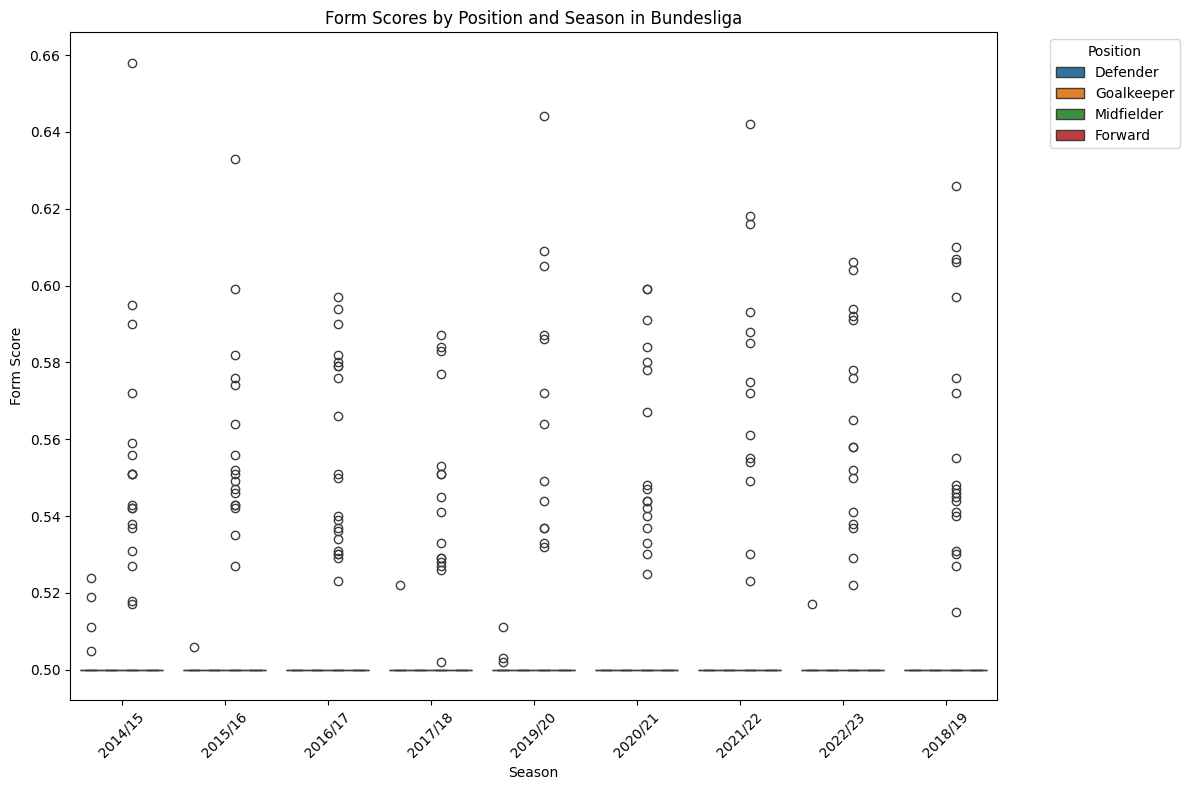

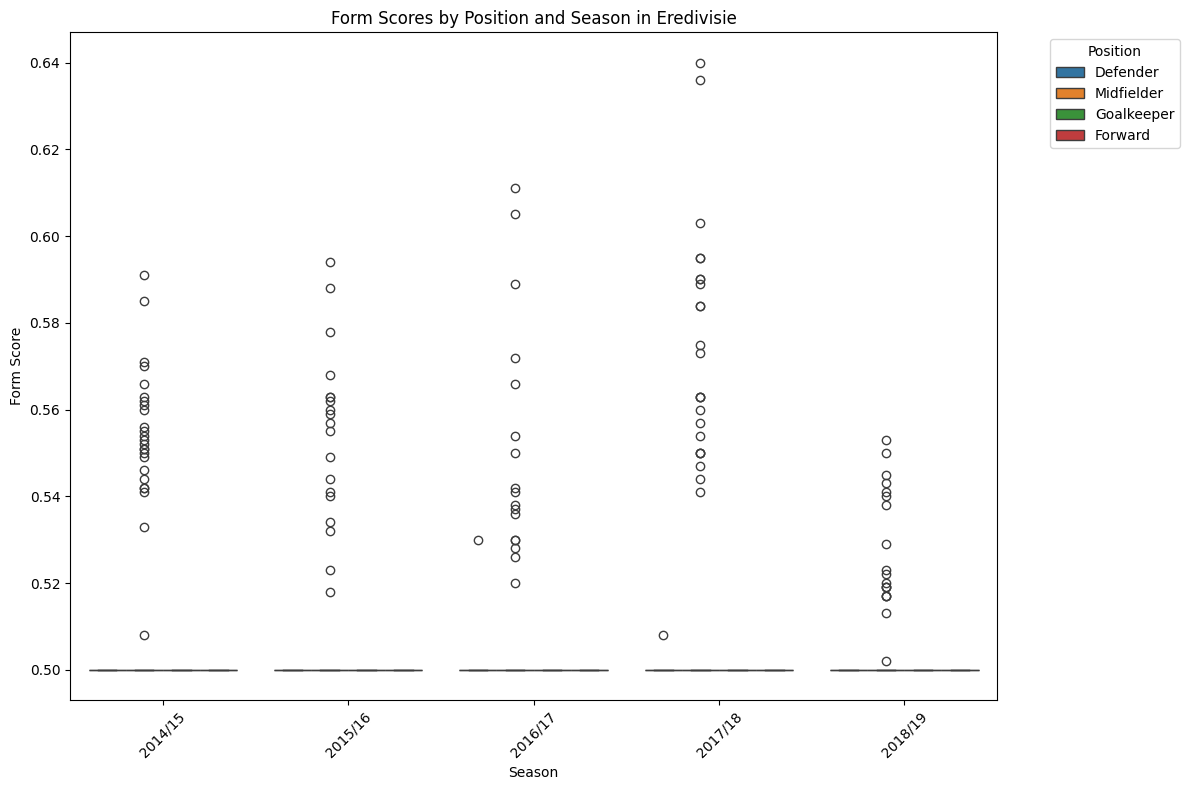

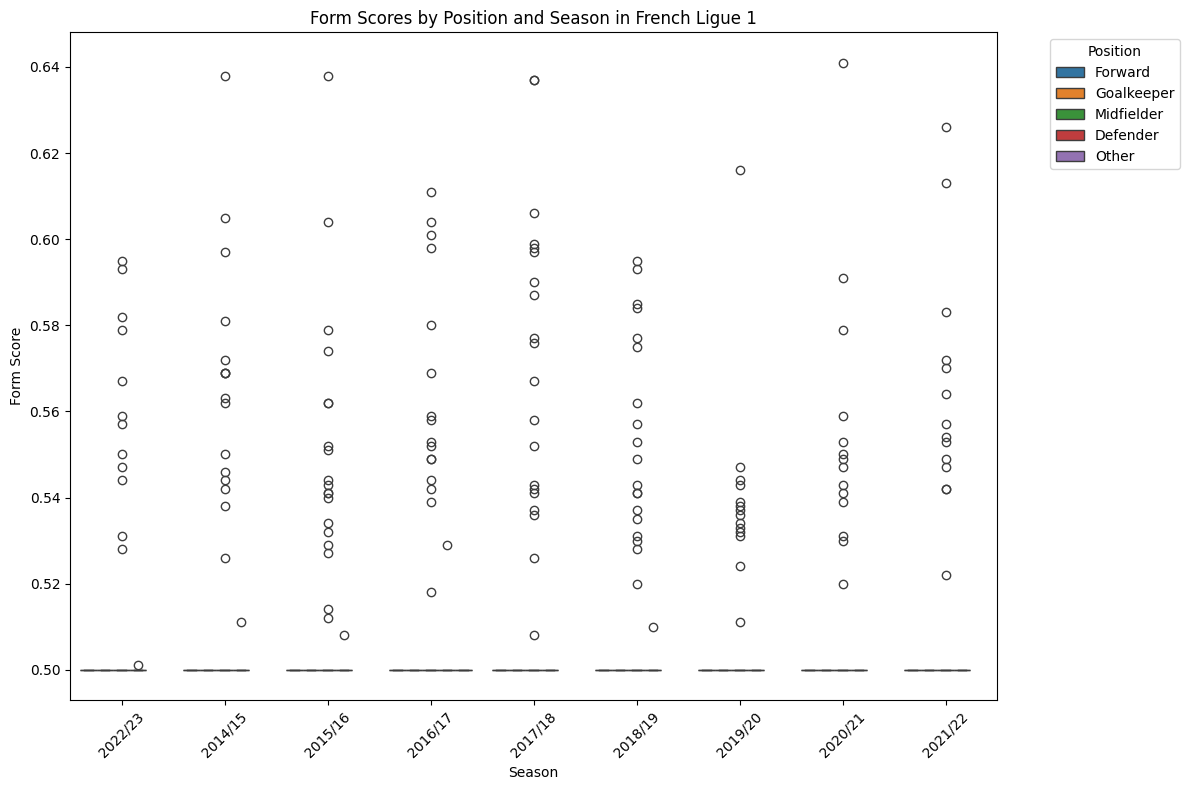

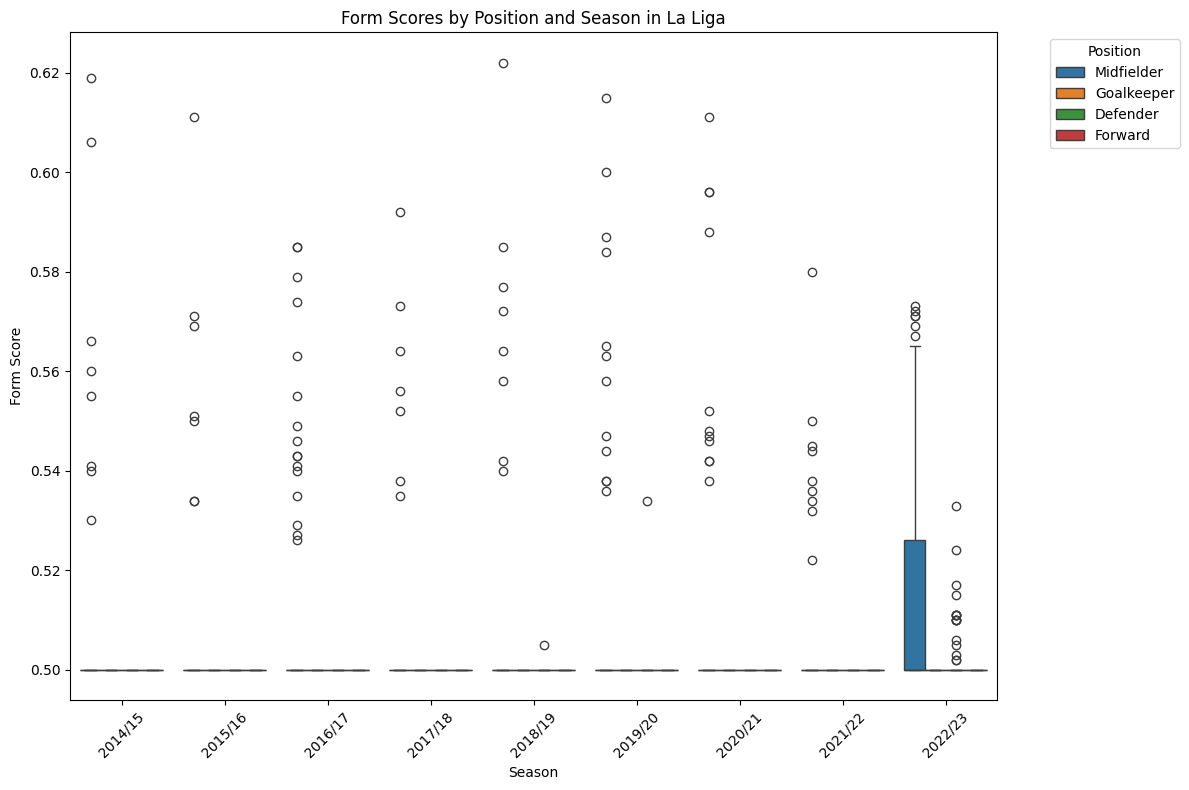

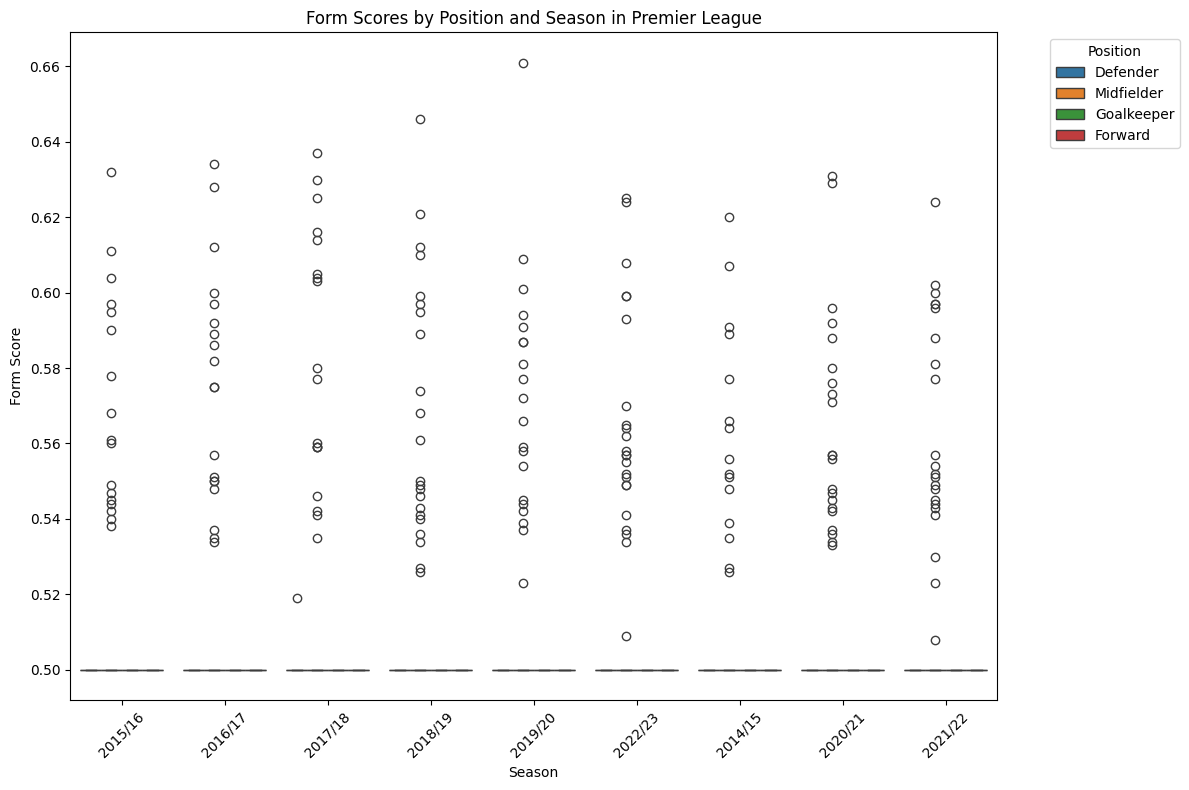

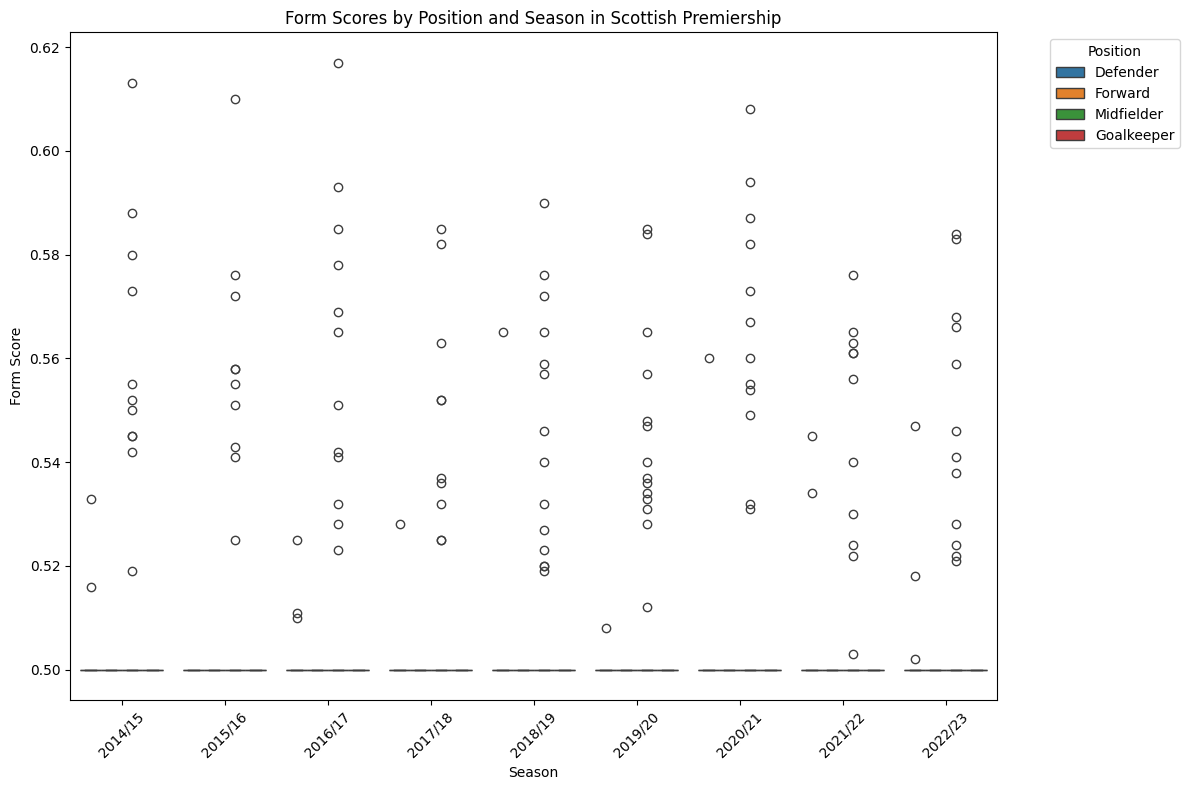

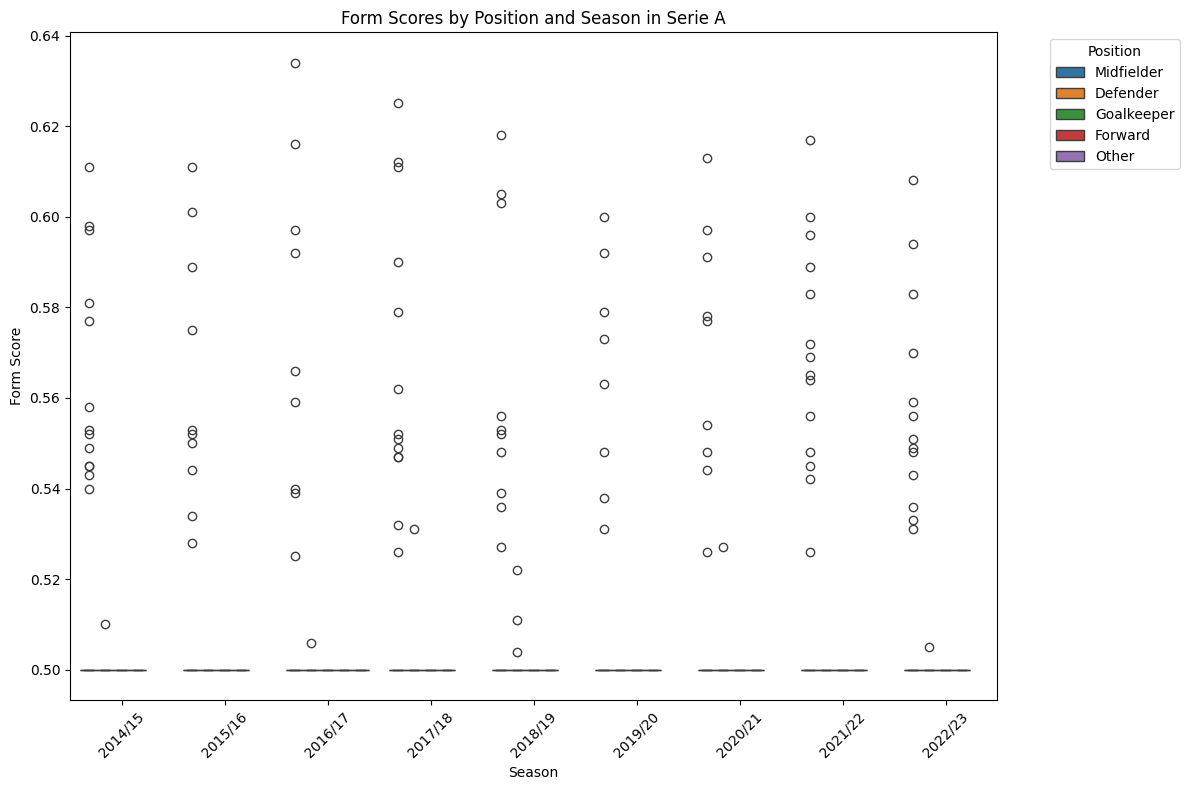

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot form scores by position for each season in each league
for league in leagues:
    # Filter data for the current league
    league_data = df2[df2['League'] == league]

    # Set up the figure and axes for each league
    plt.figure(figsize=(12, 8))

    # Create a boxplot for each position's form score by season within the league
    sns.boxplot(data=league_data, x='Season', y='Form Score', hue='Position')

    # Customize the plot
    plt.title(f'Form Scores by Position and Season in {league}')
    plt.xlabel('Season')
    plt.ylabel('Form Score')
    plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)

    # Display the plot
    plt.tight_layout()
    plt.show()


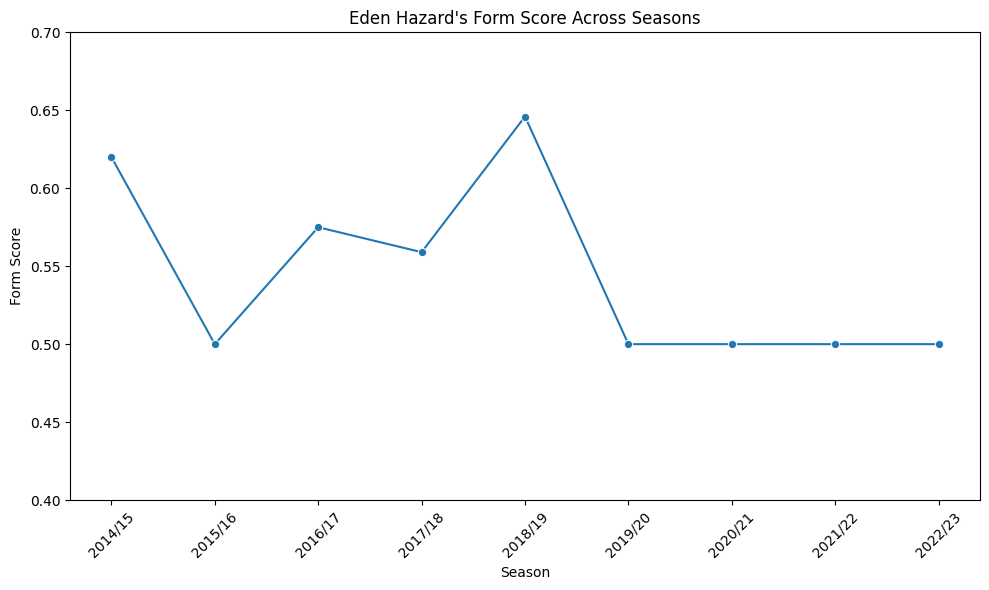

In [ ]:
player_data = df2[df2['Player'] == 'Eden Hazard']

# Sort data by season to ensure the form scores are plotted chronologically
player_data = player_data.sort_values(by='Season')

# Set up the plot
plt.figure(figsize=(10, 6))

# Line plot to show form score over seasons
sns.lineplot(data=player_data, x='Season', y='Form Score', marker='o')

# Customize the plot
plt.title("Eden Hazard's Form Score Across Seasons")
plt.xlabel("Season")
plt.ylabel("Form Score")
plt.ylim(0.4, 0.7)  # Set y-axis range to 0-1 for consistency
plt.xticks(rotation=45)  # Rotate season labels if needed for clarity

# Display the plot
plt.tight_layout()
plt.show()

Chart displays Eden Hazard's form across multiple seasons, showing his performance fluctuations over time. His form score improved from 2015/2016 to 2018/19 season but declined sharply afterward. This trend highlights his strong seasons early on, followed by a noticeable drop in performance in later years which is essential for the stakeholders.

##EDA

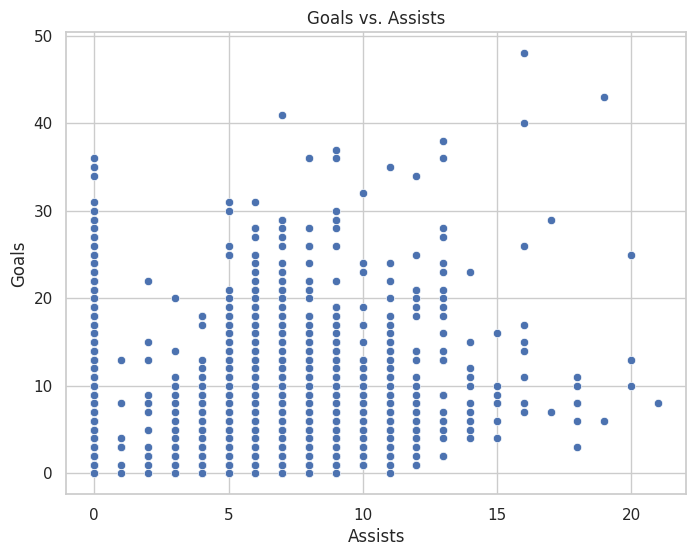

Correlation between Goals and Assists: 0.4283473516237889


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid")

# 1. Player Performance Metrics

# Goals vs. Assists
plt.figure(figsize=(8, 6))
sns.scatterplot(data=d2, x="Assists", y="Goals")
plt.title("Goals vs. Assists")
plt.show()
print("Correlation between Goals and Assists:", d2["Goals"].corr(d2["Assists"]))


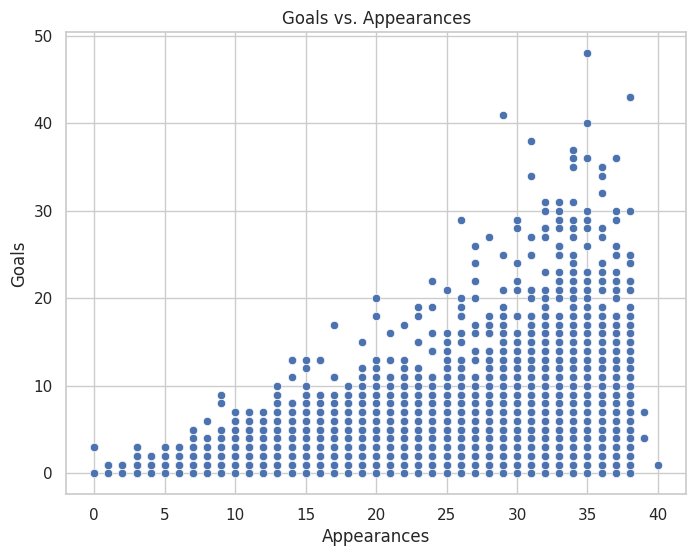

Correlation between Goals and Appearances: 0.4752048756668161


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=d2, x="Appearances", y="Goals")
plt.title("Goals vs. Appearances")
plt.show()
print("Correlation between Goals and Appearances:", d2["Goals"].corr(d2["Appearances"]))


Chart shows that player having more appearances is likely to score more number of goals.

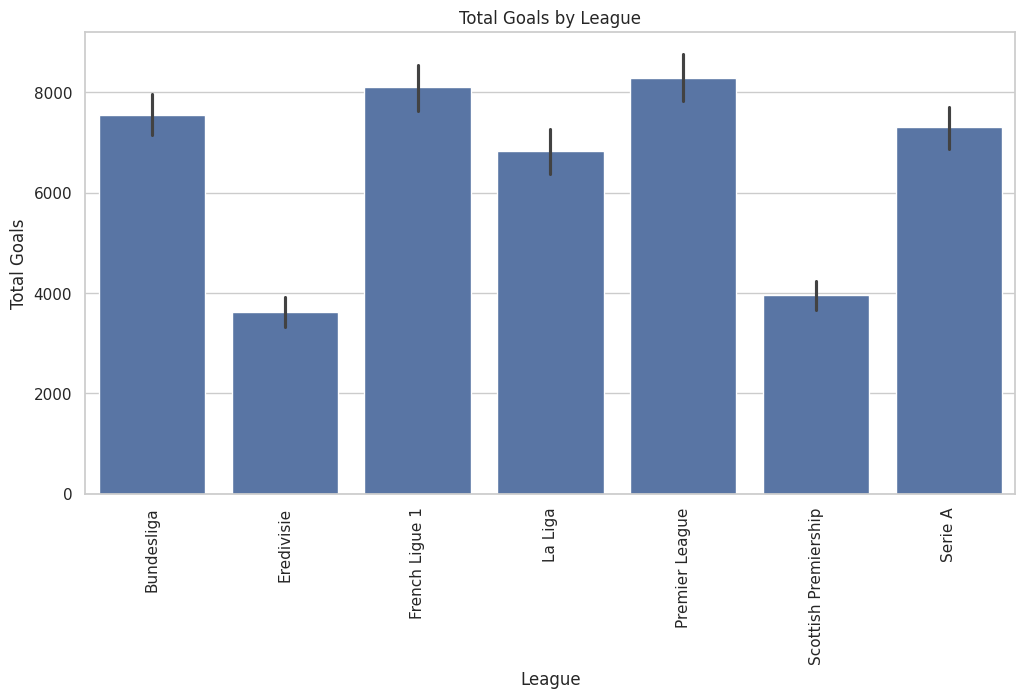

In [ ]:

# Creating a bar plot where League_x is on the x-axis and total goals are on the y-axis
plt.figure(figsize=(12, 6))
sns.barplot(data=d2, x="League", y="Goals", estimator=sum)
plt.xticks(rotation=90)
plt.title("Total Goals by League")
plt.xlabel("League")
plt.ylabel("Total Goals")
plt.show()

The two charts one above and below has a motive where stakeholders can see in which leagues player performed well and scored highest number of goals.

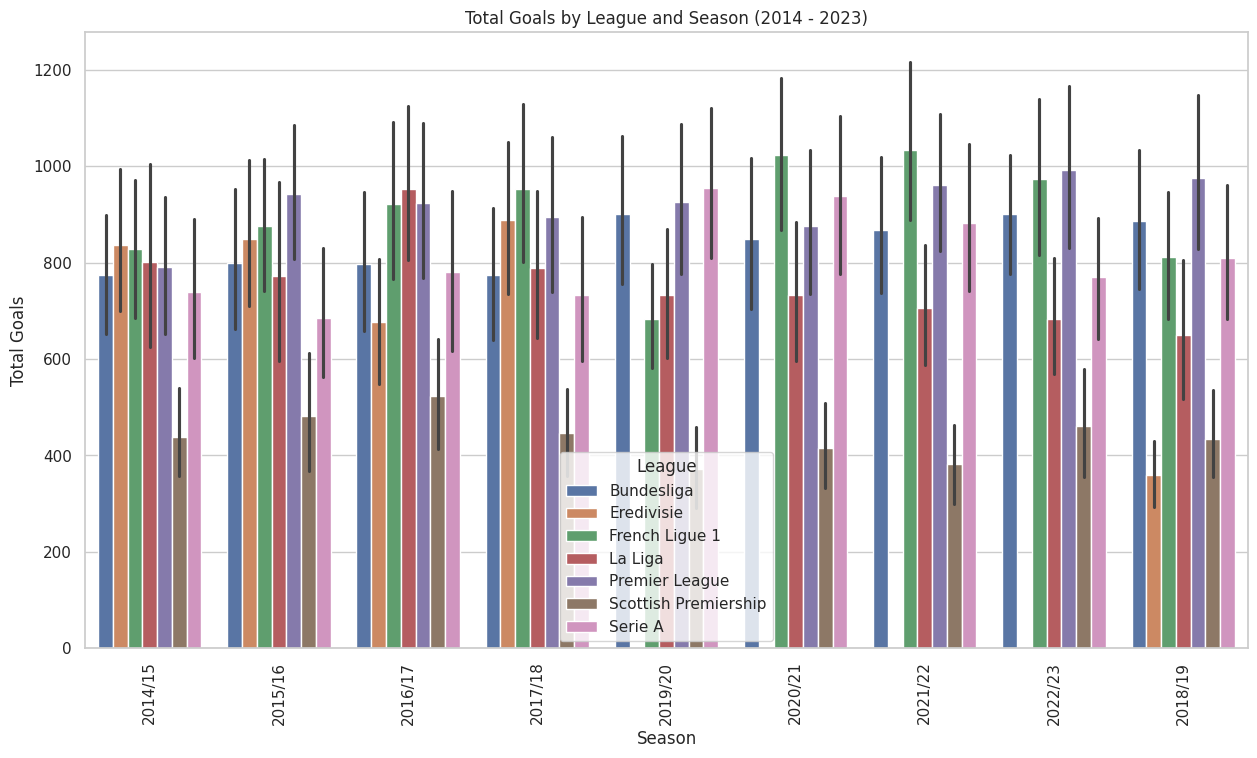

In [ ]:
d2_filtered = d2[d2['Season'].str.contains('2014|2015|2016|2017|2018|2019|2020|2021|2022|2023', na=False)]

# Plot total goals per league for each season
plt.figure(figsize=(15, 8))
sns.barplot(data=d2_filtered, x="Season", y="Goals", hue="League", estimator=sum)
plt.xticks(rotation=90)
plt.title("Total Goals by League and Season (2014 - 2023)")
plt.xlabel("Season")
plt.ylabel("Total Goals")
plt.legend(title="League")
plt.show()

## Exploring the data and correlations

- Playing time strongly correlates with goal-scoring (0.81), while goals and assists show a moderate link (0.43), indicating some overlap in scoring and assisting skills. Assists and appearances (0.27) and appearances and minutes (0.35) have weaker correlations, thus we suggest that more games don’t guarantee higher statistics due to factors like substitutions etc.
- Boxplot shows that forwards are the main goal scorers, with a high median and wide range. Midfielders and defenders score fewer goals, while goalkeepers rarely score, except for a few outliers. The “Other” category, including wingbacks, resembles midfielders in low goal scoring.
- ar chart shows that teams score more goals at home than away, highlighting the "home advantage." Factors like crowd support, familiarity with the pitch, and less travel stress likely contribute to this improved performance.
- Correlation matrix 2 shows a minimal impact of weather on goal scoring. There’s a weak positive link between goals and average temperature

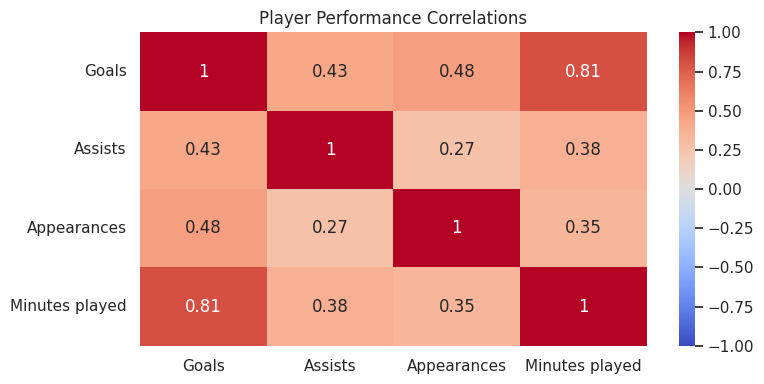

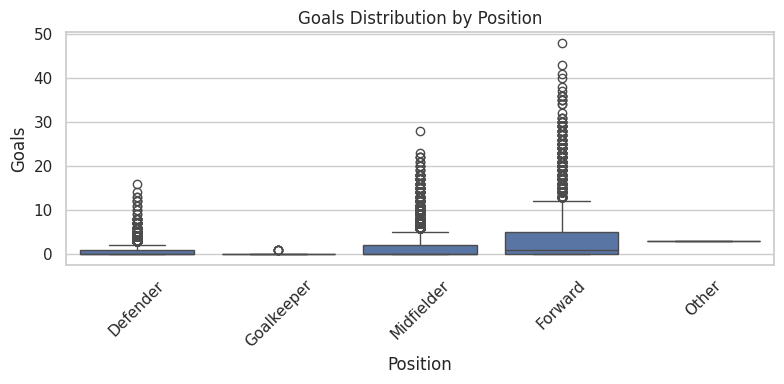

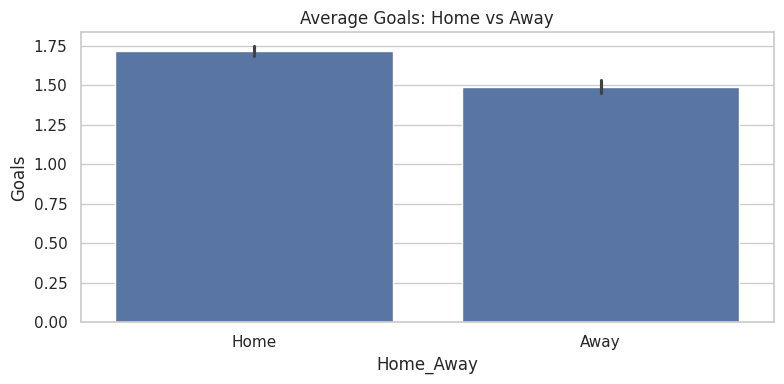

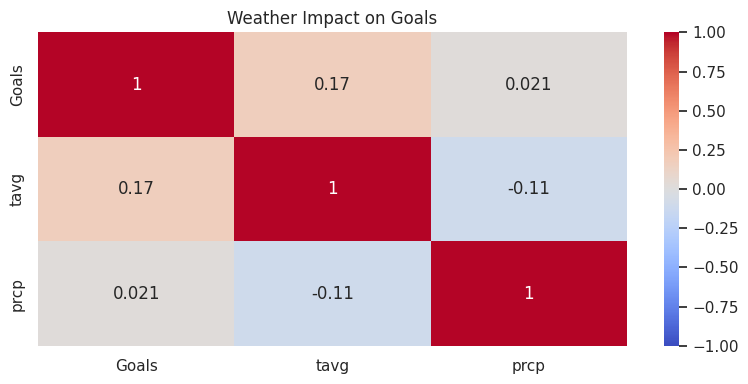

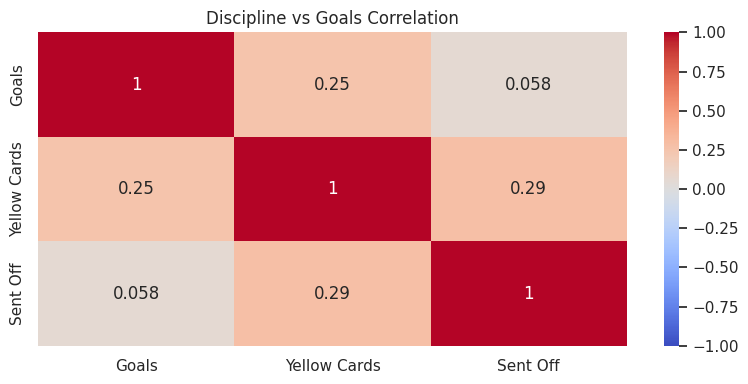

Average Goals: 1.53
Total Goals: 45620.00
Max Goals in a Game: 48.00
Average Assists: 0.37
Goals per Appearance: 0.10


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_football_correlations(df2):
    """
    Simplified analysis of football player performance correlations based on updated column names
    """
    # Set figure size for better visibility
    plt.rcParams['figure.figsize'] = [8, 4]

    # 1. Player Performance Correlations
    performance_cols = ['Goals', 'Assists', 'Appearances', 'Minutes played']
    performance_corr = df2[performance_cols].corr()

    plt.figure()
    sns.heatmap(performance_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Player Performance Correlations')
    plt.tight_layout()
    plt.show()

    # 2. Goals Distribution by Position
    plt.figure()
    sns.boxplot(data=df2, x='Position', y='Goals')
    plt.title('Goals Distribution by Position')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 3. Home vs Away Goals
    plt.figure()
    df2['Home_Away'] = df2.apply(lambda row: 'Home' if row['Home'] == 1 else 'Away', axis=1)
    sns.barplot(data=df2, x='Home_Away', y='Goals')
    plt.title('Average Goals: Home vs Away')
    plt.tight_layout()
    plt.show()

    # 4. Weather Impact on Goals
    weather_cols = ['Goals', 'tavg', 'prcp']
    weather_corr = df2[weather_cols].corr()

    plt.figure()
    sns.heatmap(weather_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Weather Impact on Goals')
    plt.tight_layout()
    plt.show()

    # 5. Discipline vs Goals
    discipline_cols = ['Goals', 'Yellow Cards', 'Sent Off']
    discipline_corr = df2[discipline_cols].corr()

    plt.figure()
    sns.heatmap(discipline_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Discipline vs Goals Correlation')
    plt.tight_layout()
    plt.show()

    # Basic summary statistics
    summary = {
        'Average Goals': df2['Goals'].mean(),
        'Total Goals': df2['Goals'].sum(),
        'Max Goals in a Game': df2['Goals'].max(),
        'Average Assists': df2['Assists'].mean(),
        'Goals per Appearance': df2['Goals'].sum() / df2['Appearances'].sum()
    }

    return summary

# Example usage:
# Run the analysis
stats = analyze_football_correlations(df2)

# Print summary statistics
for metric, value in stats.items():
    print(f"{metric}: {value:.2f}")

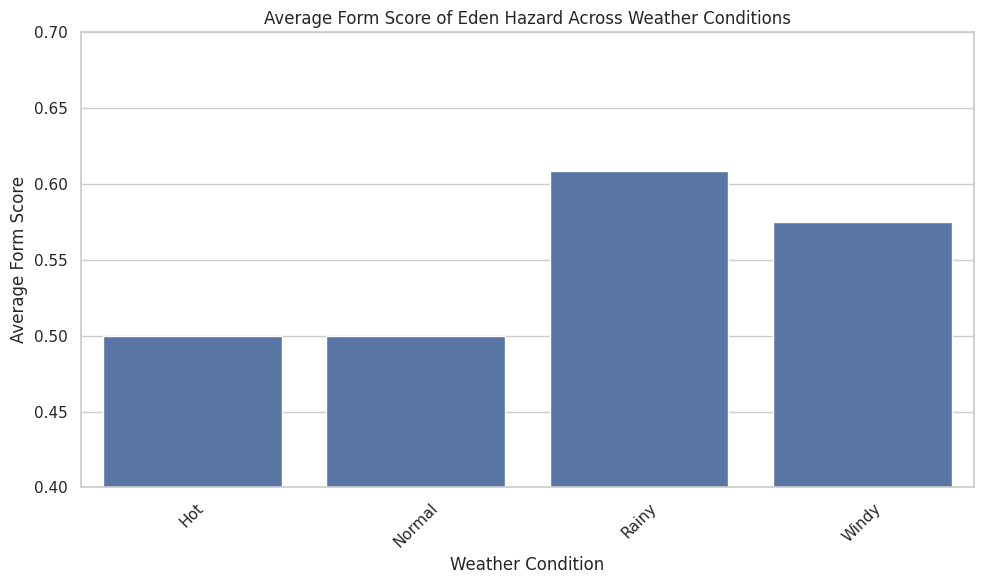

In [ ]:
# Filter data for Eden Hazard
player_data = df2[df2['Player'] == 'Eden Hazard']

# Calculate average form score for each weather condition
weather_form_score = player_data.groupby('weather_summary')['Form Score'].mean().reset_index()

# Set up the plot for a bar plot
plt.figure(figsize=(10, 6))

# Bar plot to show average form score across weather conditions
sns.barplot(data=weather_form_score, x='weather_summary', y='Form Score')

# Customize the plot
plt.title("Average Form Score of Eden Hazard Across Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Average Form Score")
plt.ylim(0.4, 0.7)  # Set y-axis range to match the form score range
plt.xticks(rotation=45)  # Rotate weather condition labels for clarity

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Group data by 'season' to get average weather conditions for each season
season_weather = df2.groupby('Season').agg({
    'tavg': 'mean',
    'tmin': 'mean',
    'tmax': 'mean',
    'prcp': 'mean',
    'wspd': 'mean'
})

print(season_weather)

# Group data by 'game_date' to get daily weather conditions
daily_weather = df2.groupby('game_date').agg({
    'tavg': 'mean',
    'tmin': 'mean',
    'tmax': 'mean',
    'prcp': 'mean',
    'wspd': 'mean'
})

daily_weather

              tavg       tmin       tmax      prcp       wspd
Season                                                       
2014/15  14.365724  10.658215  18.286811  2.544450  13.312341
2015/16  16.489752  12.386540  20.799504  2.950603  12.967323
2016/17  18.764544  13.655938  24.008326  0.878926  11.782383
2017/18  17.593118  12.715505  22.442798  1.200978  12.216759
2018/19  17.366156  12.401023  22.440807  1.368683  11.144411
2019/20  19.548184  14.667672  24.713586  1.602856  11.435665
2020/21  15.151147  10.766483  19.850321  3.175077  12.546598
2021/22  18.951181  14.386275  23.809120  1.312081  10.388371
2022/23  20.385428  15.211759  25.820497  1.989178  10.931089


,tavg,tmin,tmax,prcp,wspd
game_date,,,,,
01-01-2022,10.331959,7.292784,14.072165,0.123457,12.693814
01-16-2021,3.563303,-0.090826,7.649541,1.871951,12.980734
01-26-2015,5.627273,2.908257,8.784545,2.230556,15.980392
02-01-2020,11.037168,7.715044,14.373451,2.513333,17.000885
05-12-2019,11.792950,6.374676,16.869496,1.431504,13.088986
...,...,...,...,...,...
12-25-2018,5.676636,2.533645,9.081308,0.085526,9.381553
12-26-2015,10.430252,7.931933,13.653782,1.586905,20.656881
12-30-2017,8.757018,4.453509,12.454464,3.919753,19.588182


In [ ]:
# Group data by 'Position' and calculate relevant performance metrics
position_metrics = df2.groupby('Position').agg({
    'Goals': 'mean',
    'Assists': 'mean',
    'Yellow Cards': 'mean',
    'Minutes played': 'mean',
    'Appearances': 'count',  # Number of appearances for each position
})

position_metrics

,Goals,Assists,Yellow Cards,Minutes played,Appearances
Position,,,,,
Defender,0.620965,0.116534,2.660794,24.898129,9139
Forward,3.606279,0.549869,1.669065,502.569163,6116
Goalkeeper,0.001791,0.000000,0.431940,0.000000,3350
Midfielder,1.582596,0.577638,2.460871,177.780099,11296
Other,3.000000,0.000000,0.000000,0.000000,2


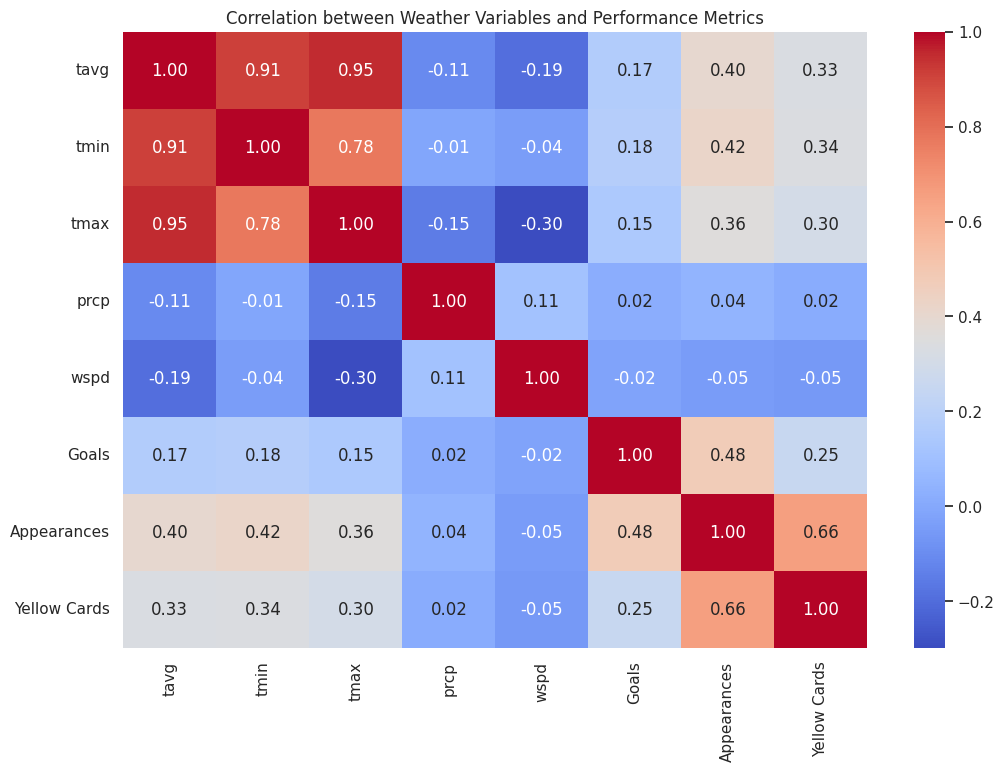

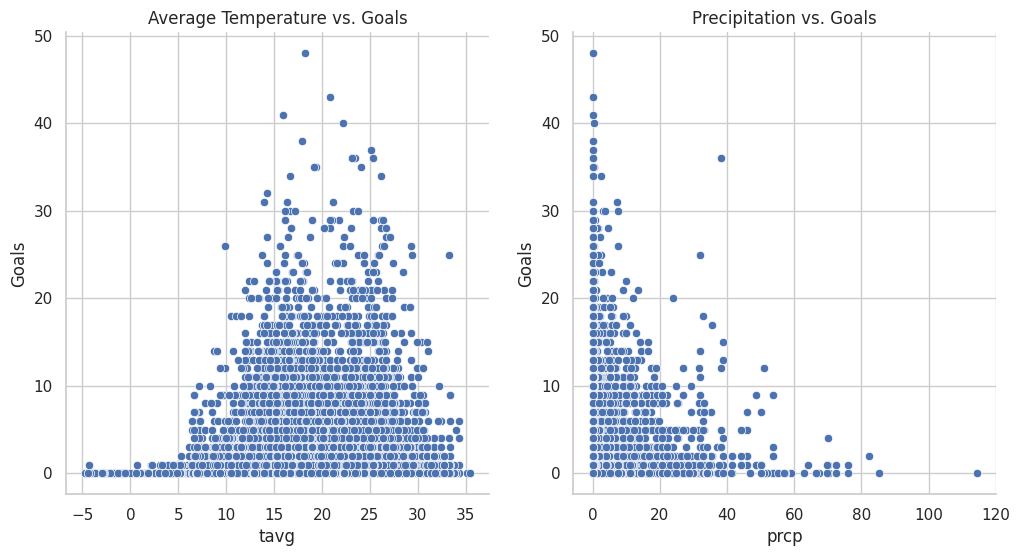

In [ ]:
# Weather Impact: Analyze the impact of weather variables ('tavg', 'tmin', 'tmax', 'prcp', etc.) on performance metrics using correlation heatmaps or scatter plots.

# Correlation matrix for weather variables and performance metrics
weather_performance_corr = df2[['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'Goals', 'Appearances', 'Yellow Cards']].corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(12, 8))
sns.heatmap(weather_performance_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Weather Variables and Performance Metrics')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

# Scatter plots for specific weather variables and performance metrics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='tavg', y='Goals', data=df2)
plt.title('Average Temperature vs. Goals')
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.subplot(1, 2, 2)
sns.scatterplot(x='prcp', y='Goals', data=df2)
plt.title('Precipitation vs. Goals')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()


### Initial Machine Learning Models
we split data into training and testing sets to test predictions using various machine learning models we also note down metrics to evaluate and improve models.

In [ ]:
# Split data into training, validation, and testing sets, making sure to keep the temporal sequence intact to avoid data leakage.

# Split the data into training, validation, and testing sets (e.g., 70%, 15%, 15%)
train_size = int(len(df2) * 0.7)
val_size = int(len(df2) * 0.15)
test_size = len(df2) - train_size - val_size

train_data = df2[:train_size]
val_data = df2[train_size:train_size + val_size]
test_data = df2[train_size + val_size:]

# Verify the split
print(f"Train data size: {len(train_data)}")
print(f"Validation data size: {len(val_data)}")
print(f"Test data size: {len(test_data)}")

Train data size: 20932
Validation data size: 4485
Test data size: 4486


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
features = ['Goals', 'Assists', 'Minutes played', 'Yellow Cards']  # Replace with your relevant features
target = 'Form Score'

X = df2[features]
y = df2[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

# Evaluate Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)

# 2. Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

# Evaluate Decision Tree
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nDecision Tree:")
print("Mean Squared Error:", mse_tree)
print("R-squared:", r2_tree)

# Analyze variable importance from the decision tree model
feature_importances = tree_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
print("\nFeature Importance (Decision Tree):")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Linear Regression:
Mean Squared Error: 7.085397674259073e-05
R-squared: 0.40062501077820023

Decision Tree:
Mean Squared Error: 0.00010690453101488047
R-squared: 0.09566258563594288

Feature Importance (Decision Tree):
          Feature  Importance
2  Minutes played    0.581521
1         Assists    0.177881
0           Goals    0.150115
3    Yellow Cards    0.090483


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Load the dataset
# df2 = pd.read_csv('data_with_form_score_by_position.csv')

# Check for categorical columns and encode them
categorical_columns = ['League', 'Team', 'Position', 'Season', 'Player']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])
    label_encoders[col] = le  # Save encoder for each column in case we need to inverse transform later

# Convert percentage columns to numeric if they exist (remove the '%' sign)
for column in df2.columns:
    if df2[column].dtype == 'object' and df2[column].str.contains('%').any():
        df2[column] = df2[column].str.replace('%', '').astype(float) / 100

# Assuming 'Form Score' is the target, convert it into classes if needed
# Here, we'll create binary classes for simplicity: Low Form (<= 0.5), High Form (> 0.5)
df2['Form Class'] = df2['Form Score'].apply(lambda x: 1 if x > 0.5 else 0)

# Separate features and target variable
X = df2.drop(['Form Score', 'Form Class'], axis=1)
y = df2['Form Class']

# Ensure X only contains numeric data
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Check for class imbalance
print("Class distribution before balancing:", y.value_counts())

# Balance the classes using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

print("Class distribution after balancing:", y_balanced.value_counts())

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Train a model (RandomForestClassifier in this case)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Class distribution before balancing: Form Class
0    28887
1     1016
Name: count, dtype: int64
Class distribution after balancing: Form Class
0    28887
1    28887
Name: count, dtype: int64
Accuracy: 0.9991345737775854
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5701
           1       1.00      1.00      1.00      5854

    accuracy                           1.00     11555
   macro avg       1.00      1.00      1.00     11555
weighted avg       1.00      1.00      1.00     11555



In [ ]:

# Select features and target variable
features = ['Appearances', 'Minutes played', 'Assists', 'Yellow Cards', 'Right Foot', 'Left Foot', 'Header']
target = 'Goals'

X = df2[features]
y = df2[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

# Evaluate Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)


# 2. Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

# Evaluate Decision Tree
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("\nDecision Tree:")
print("Mean Squared Error:", mse_tree)
print("R-squared:", r2_tree)

# Analyze variable importance from the decision tree model
feature_importances = tree_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
print("\nFeature Importance (Decision Tree):")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Linear Regression:
Mean Squared Error: 0.261848594525532
R-squared: 0.9744773206789022

Decision Tree:
Mean Squared Error: 0.36924080176859436
R-squared: 0.964009680506855

Feature Importance (Decision Tree):
          Feature  Importance
1  Minutes played    0.605262
4      Right Foot    0.248004
5       Left Foot    0.098743
6          Header    0.038572
3    Yellow Cards    0.003523
0     Appearances    0.003241
2         Assists    0.002655


## **Challenges and Problems**

### **1. Complexity in Data Merging**
- Identifying the **key columns** across multiple datasets was **challenging and time-consuming** due to:
  - **Inconsistent naming conventions**
  - **Varying formats**
  - **Missing identifiers**
- This required **manual verification and alignment** before merging.

### **2. Data Cleaning Difficulties**
- Cleaning the dataset **in one step was impractical** due to:
  - **Dash values ("-")** that required special handling.
  - **Null values** that varied across columns.
- A **column-by-column approach** was necessary to ensure proper handling of **different data types**.

### **3. Model Overfitting & Underperformance**
- Initial models either:
  - **Overfitted the training data**, failing to generalize.
  - **Underperformed on test data**, leading to poor accuracy.
- To resolve this, we implemented:
  - **Normalization techniques** (Min-Max Scaling, Standardization).
  - **Feature selection methods** to reduce noise and improve performance.

---

**By addressing these challenges, we improved data quality and model accuracy, ensuring more reliable football player performance predictions!**


# Next steps
- Our project havent yet explored player forms in terms of time series analysis we plan to get into using that.
- Our machine learning models underperform or overfit so to handle that we plan to normalize data, improve upon feature engineering and look for ways to perfect the models.
- We plan to display an individual player performance at the end for stakeholders to use our model.
